## Data Analysis of Ames Iowa Housing Dataset

## Install & Load Libraries

In [661]:
#pip install numpy pandas matplotlib seaborn scikit-learn xgboost optuna reportlab pillow shap skops

In [663]:
# Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import mutual_info_regression, RFE, SelectFromModel
#from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor 
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
import optuna
import skops.io as sio
#from sklearn.compose import ColumnTransformer
#from sklearn.neighbors import LocalOutlierFactor

In [440]:
import shap
import xgboost

## Load Dataset

In [442]:
Ames = pd.read_csv('AmesHousing.csv')
Ames.sample(5)

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
1192   1193  534201240           60        RL          73.0      8814   Pave   
1425   1426  906412010           20        RL          91.0     11778   Pave   
2070   2071  905228020           20        RL           NaN      9000   Pave   
1479   1480  907418040           20        RL          74.0      9627   Pave   
1445   1446  907201060           80        RL          65.0      8385   Pave   

     Alley Lot Shape Land Contour  ... Pool Area Pool QC Fence Misc Feature  \
1192   NaN       Reg          Lvl  ...         0     NaN   NaN          NaN   
1425   NaN       Reg          Lvl  ...         0     NaN   NaN          NaN   
2070   NaN       Reg          Lvl  ...         0     NaN   NaN          NaN   
1479   NaN       Reg          Lvl  ...         0     NaN   NaN          NaN   
1445   NaN       Reg          Lvl  ...         0     NaN   NaN          NaN   

     Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
1192        0       6    2008       WD           Normal     141000  
1425        0       6    2008       WD          Abnorml     475000  
2070        0       5    2007       WD           Normal      89500  
1479        0       6    2008       WD           Normal     193000  
1445        0      11    2008       WD           Normal     149900  

[5 rows x 82 columns]

In [443]:
#Ames = pd.read_csv('AmesHousing.csv', header=0, sep=',')
#Ames.sample(5)

## Data Preprocessing & EDA

In [445]:
df = pd.DataFrame(Ames)
df

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0      NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1      NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2      NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3      NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4      NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   
...    ...       ...          ...  ...       ...     ...    ...          ...   
2925   NaN       IR1          Lvl  ...         0     NaN  GdPrv          NaN   
2926   NaN       IR1          Low  ...         0     NaN  MnPrv          NaN   
2927   NaN       Reg          Lvl  ...         0     NaN  MnPrv         Shed   
2928   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
2929   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   

     Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0           0       5    2010       WD           Normal     215000  
1           0       6    2010       WD           Normal     105000  
2       12500       6    2010       WD           Normal     172000  
3           0       4    2010       WD           Normal     244000  
4           0       3    2010       WD           Normal     189900  
...       ...     ...     ...       ...             ...        ...  
2925        0       3    2006       WD           Normal     142500  
2926        0       6    2006       WD           Normal     131000  
2927      700       7    2006       WD           Normal     132000  
2928        0       4    2006       WD           Normal     170000  
2929        0      11    2006       WD           Normal     188000  

[2930 rows x 82 columns]

In [446]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [447]:
# .nunique is similar to .value_counts except that .value_counts outputs more details and requires iteration through each column
# .nunique prints out number of unique element in each column
a = df.nunique()
a

Order             2930
PID               2930
MS SubClass         16
MS Zoning            7
Lot Frontage       128
                  ... 
Mo Sold             12
Yr Sold              5
Sale Type           10
Sale Condition       6
SalePrice         1032
Length: 82, dtype: int64

In [448]:
# .value_counts() work in iteration only. Iterating through each column. The context here is column index
# .value_counts prints out the count of unique values(ie. element) in each column
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print('****' * 10)

MS Zoning
RL         2273
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: count, dtype: int64
****************************************
Street
Pave    2918
Grvl      12
Name: count, dtype: int64
****************************************
Alley
Grvl    120
Pave     78
Name: count, dtype: int64
****************************************
Lot Shape
Reg    1859
IR1     979
IR2      76
IR3      16
Name: count, dtype: int64
****************************************
Land Contour
Lvl    2633
HLS     120
Bnk     117
Low      60
Name: count, dtype: int64
****************************************
Utilities
AllPub    2927
NoSewr       2
NoSeWa       1
Name: count, dtype: int64
****************************************
Lot Config
Inside     2140
Corner      511
CulDSac     180
FR2          85
FR3          14
Name: count, dtype: int64
****************************************
Land Slope
Gtl    2789
Mod     125
Sev      16
Name: count, dtype: int64
********

**Let's check if our dataset is a classification or regression type**

In [450]:
df['SalePrice'].value_counts()

SalePrice
135000    34
140000    33
130000    29
155000    28
145000    26
          ..
219990     1
159895     1
187687     1
217300     1
150900     1
Name: count, Length: 1032, dtype: int64

**From the output above, we have values that are continous and the least count is 1. It takes a minimum count of 2 to have a classification dataset.**

**Thus, it's a regression dataset.**

In [452]:
df.drop_duplicates()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0         1  526301100           20        RL         141.0     31770   Pave   
1         2  526350040           20        RH          80.0     11622   Pave   
2         3  526351010           20        RL          81.0     14267   Pave   
3         4  526353030           20        RL          93.0     11160   Pave   
4         5  527105010           60        RL          74.0     13830   Pave   
...     ...        ...          ...       ...           ...       ...    ...   
2925   2926  923275080           80        RL          37.0      7937   Pave   
2926   2927  923276100           20        RL           NaN      8885   Pave   
2927   2928  923400125           85        RL          62.0     10441   Pave   
2928   2929  924100070           20        RL          77.0     10010   Pave   
2929   2930  924151050           60        RL          74.0      9627   Pave   

     Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0      NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1      NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2      NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3      NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4      NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   
...    ...       ...          ...  ...       ...     ...    ...          ...   
2925   NaN       IR1          Lvl  ...         0     NaN  GdPrv          NaN   
2926   NaN       IR1          Low  ...         0     NaN  MnPrv          NaN   
2927   NaN       Reg          Lvl  ...         0     NaN  MnPrv         Shed   
2928   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
2929   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   

     Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0           0       5    2010       WD           Normal     215000  
1           0       6    2010       WD           Normal     105000  
2       12500       6    2010       WD           Normal     172000  
3           0       4    2010       WD           Normal     244000  
4           0       3    2010       WD           Normal     189900  
...       ...     ...     ...       ...             ...        ...  
2925        0       3    2006       WD           Normal     142500  
2926        0       6    2006       WD           Normal     131000  
2927      700       7    2006       WD           Normal     132000  
2928        0       4    2006       WD           Normal     170000  
2929        0      11    2006       WD           Normal     188000  

[2930 rows x 82 columns]

**Check for duplicated index**

In [454]:
df.duplicated().any()

False

In [455]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [456]:
## Sorting then Filtering (Not the best approach)
#missing_values = df.isnull().sum().sort_values(ascending=True)
#print(missing_values[missing_values > 0])

## Filtering then Sorting (is the best approach)
missing_values = df.isnull().sum()
missing_values_filtered_sorted = missing_values[missing_values > 0].sort_values(ascending=True)
missing_values_filtered_sorted

Electrical           1
Garage Cars          1
BsmtFin SF 1         1
Garage Area          1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Half Bath       2
Bsmt Full Bath       2
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
BsmtFin Type 1      80
BsmtFin Type 2      81
Bsmt Exposure       83
Garage Type        157
Garage Qual        159
Garage Cond        159
Garage Yr Blt      159
Garage Finish      159
Lot Frontage       490
Fireplace Qu      1422
Mas Vnr Type      1775
Fence             2358
Alley             2732
Misc Feature      2824
Pool QC           2917
dtype: int64

In [457]:
percent_missing_values = (missing_values_filtered_sorted / df.shape[0]) *100
percent_missing_values

Electrical         0.034130
Garage Cars        0.034130
BsmtFin SF 1       0.034130
Garage Area        0.034130
BsmtFin SF 2       0.034130
Bsmt Unf SF        0.034130
Total Bsmt SF      0.034130
Bsmt Half Bath     0.068259
Bsmt Full Bath     0.068259
Mas Vnr Area       0.784983
Bsmt Qual          2.730375
Bsmt Cond          2.730375
BsmtFin Type 1     2.730375
BsmtFin Type 2     2.764505
Bsmt Exposure      2.832765
Garage Type        5.358362
Garage Qual        5.426621
Garage Cond        5.426621
Garage Yr Blt      5.426621
Garage Finish      5.426621
Lot Frontage      16.723549
Fireplace Qu      48.532423
Mas Vnr Type      60.580205
Fence             80.477816
Alley             93.242321
Misc Feature      96.382253
Pool QC           99.556314
dtype: float64

**We will drop features with missing values of 50% and above. Thus, we are dropping 6 features with missing values from 50% and above.** 

**We will also drop the 'Order' and 'PID' columns because they serve no use for Merchine Learning.**

**NOTE:** To create a new dataframe, **always .select_dtypes(include=['int', 'float', 'object']) before you .drop(columns=['SalePrice'])**, and **don't use inplace=True** But if your intention is to modify an existing dataframe (e.g., to drop column(s)), there is **no need to .select_dtypes()**. Use **inplace=True, but do not create an object** for the drop operation (such as assigning it to df). Otherwise, your
print of **df will return 'None'**.

**You CANNOT pass an object and use inplace=True at the same time**

In [460]:
df.drop(columns=['Order', 'PID', 'Fireplace Qu', 'Mas Vnr Type', 'Fence', 'Alley', 'Misc Feature', 'Pool QC'], inplace=True)

In [461]:
df.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Type',
       'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',
       'Garage Q

In [462]:
df.shape

(2930, 74)

In [463]:
df.duplicated().any()

False

Note: If you forget to add 'float' to the .select_dtype, you run into error of having incomplete total numeric columns.

In [465]:
#X_numerical_df = df.select_dtypes(include=['int', 'float']).drop(columns='SalePrice')
#print(X_numerical_df.head())

**We Split the dataframe into X and y set**

In [467]:
X_df = df.select_dtypes(['int', 'float', 'object']).drop(columns='SalePrice')
X_df.head()

MS SubClass MS Zoning  Lot Frontage  Lot Area Street Lot Shape  \
0           20        RL         141.0     31770   Pave       IR1   
1           20        RH          80.0     11622   Pave       Reg   
2           20        RL          81.0     14267   Pave       IR1   
3           20        RL          93.0     11160   Pave       Reg   
4           60        RL          74.0     13830   Pave       IR1   

  Land Contour Utilities Lot Config Land Slope  ... Open Porch SF  \
0          Lvl    AllPub     Corner        Gtl  ...            62   
1          Lvl    AllPub     Inside        Gtl  ...             0   
2          Lvl    AllPub     Corner        Gtl  ...            36   
3          Lvl    AllPub     Corner        Gtl  ...             0   
4          Lvl    AllPub     Inside        Gtl  ...            34   

  Enclosed Porch 3Ssn Porch Screen Porch Pool Area  Misc Val  Mo Sold  \
0              0          0            0         0         0        5   
1              0          0          120         0         0        6   
2              0          0            0         0     12500        6   
3              0          0            0         0         0        4   
4              0          0            0         0         0        3   

   Yr Sold  Sale Type Sale Condition  
0     2010        WD          Normal  
1     2010        WD          Normal  
2     2010        WD          Normal  
3     2010        WD          Normal  
4     2010        WD          Normal  

[5 rows x 73 columns]

**Check for Duplicates:**

In [469]:
X_df.duplicated().any()

True

**Drop duplicates in X_df since duplicated() was True:**

**(Dropping the 'SalePrice column revealed that there was duplication in X_df since duplications are based on the entire columns in a row)**

In [471]:
X_df.drop_duplicates(inplace=True)

In [472]:
X_df.duplicated().any()

False

In [473]:
X_df.shape

(2928, 73)

In [474]:
y_df = df['SalePrice']
y_df.head()

0    215000
1    105000
2    172000
3    244000
4    189900
Name: SalePrice, dtype: int64

In [475]:
y_df.shape

(2930,)

**REINDEX y_df since some duplicates were dropped in X_df:**

In [477]:
y_df = y_df.reindex(X_df.index)

In [478]:
y_df.shape

(2928,)

**Split dataframes as part of preparing for Machine Learning- use train_test_split()**

In [480]:
X_train, X_val, y_train, y_val = train_test_split(X_df, y_df, test_size=0.15, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

**Confirm Shapes:**

In [482]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(2114, 73)
(440, 73)
(374, 73)
(2114,)
(440,)
(374,)


**Check for duplicates**

In [484]:
print(X_train.duplicated().any())
print(X_val.duplicated().any())
print(X_test.duplicated().any())
print(y_train.duplicated().any())
print(y_val.duplicated().any())
print(y_test.duplicated().any())

False
False
False
True
True
True


**NOTE- It is Normal to have duplicate values in the y set**

**NOTE- IsolationForest(), used for handling outlier, cannot handle NaN values and would return error, thus the need to remove Missing Values(NaN values included) first.**

**Handling Missing values for Numerical and Categorical data of X set- use SimpleImputer()**

* **Numerical columns**

    * We create the train, val, and test sets for Numerical columns

In [489]:
X_train_numeric = X_train.select_dtypes(include=['float','int'])
print(X_train_numeric.head())
X_val_numeric = X_val.select_dtypes(include=['float','int'])
print('*****' * 15)
print(X_val_numeric.head())
X_test_numeric = X_test.select_dtypes(include=['float','int'])
print('*****' * 15)
print(X_test_numeric.head())

      MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
1495           60          72.0      7200             6             7   
2489           80          88.0      8471             6             7   
358            60           NaN      8803             6             5   
304            50          60.0      7500             4             4   
2928           20          77.0     10010             5             5   

      Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  \
1495        1976            2001           0.0         288.0           0.0   
2489        1977            1995          46.0         506.0           0.0   
358         1994            1995           0.0         600.0           0.0   
304         1920            1950           0.0           0.0           0.0   
2928        1974            1975           0.0        1071.0         123.0   

      ...  Garage Area  Wood Deck SF  Open Porch SF  Enclosed Porch  \
1495  ...        440.

* **Categorical columns**

    * We create the train, val, and test sets for Categorical columns

In [491]:
X_train_category = X_train.select_dtypes(include='object')
print(X_train_category.head())
X_val_category = X_val.select_dtypes(include='object')
print('*****' * 15)
print(X_val_category.head())
X_test_category = X_test.select_dtypes(include='object')
print('*****' * 15)
print(X_test_category.head())

     MS Zoning Street Lot Shape Land Contour Utilities Lot Config Land Slope  \
1495        RL   Pave       Reg          Lvl    AllPub     Inside        Gtl   
2489        RL   Pave       IR1          Lvl    AllPub     Corner        Gtl   
358         RL   Pave       IR1          Lvl    AllPub     Inside        Gtl   
304    C (all)   Pave       Reg          Lvl    AllPub     Inside        Gtl   
2928        RL   Pave       Reg          Lvl    AllPub     Inside        Mod   

     Neighborhood Condition 1 Condition 2  ... Electrical Kitchen Qual  \
1495      Edwards        Norm        Norm  ...      SBrkr           TA   
2489       Sawyer        Norm        Norm  ...      SBrkr           TA   
358       Gilbert        Norm        Norm  ...      SBrkr           Gd   
304        IDOTRR        Norm        Norm  ...      FuseA           TA   
2928      Mitchel        Norm        Norm  ...      SBrkr           TA   

     Functional Garage Type Garage Finish Garage Qual Garage Cond Paved Dr

* **Numerical columns**

**Instantiate SimpleImputer() -create object for SimpleImputer()** 

In [493]:
sim_imputer_numeric = SimpleImputer(strategy='median')

# Fit model to data to train data
sim_imputer_numeric.fit(X_train_numeric)

# Transform X_train_numeric with trained model
X_train_numeric_imputed = sim_imputer_numeric.transform(X_train_numeric)

# Transform X_val_numeric with trained model
X_val_numeric_imputed = sim_imputer_numeric.transform(X_val_numeric)

# Transform X_test_numeric with trained model
X_test_numeric_imputed = sim_imputer_numeric.transform(X_test_numeric)

**Convert Imputed objects back to DataFrames**

**(Notice that we passed the original index (generated after train test split) to the converted dataframes, to avoid future mismatch)**
**Otherwise, these new datframes will have their index reset which we don't want.**

In [495]:
X_train_numeric_imputed_df = pd.DataFrame(X_train_numeric_imputed, columns=X_train_numeric.columns, index=X_train.index)
X_val_numeric_imputed_df = pd.DataFrame(X_val_numeric_imputed, columns=X_val_numeric.columns, index=X_val.index)
X_test_numeric_imputed_df = pd.DataFrame(X_test_numeric_imputed, columns=X_test_numeric.columns, index=X_test.index)

print(X_train_numeric_imputed_df.head())
print('*****' * 15)
print(X_val_numeric_imputed_df.head())
print('*****' * 15)
print(X_test_numeric_imputed_df.head())

      MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
1495         60.0          72.0    7200.0           6.0           7.0   
2489         80.0          88.0    8471.0           6.0           7.0   
358          60.0          68.0    8803.0           6.0           5.0   
304          50.0          60.0    7500.0           4.0           4.0   
2928         20.0          77.0   10010.0           5.0           5.0   

      Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  \
1495      1976.0          2001.0           0.0         288.0           0.0   
2489      1977.0          1995.0          46.0         506.0           0.0   
358       1994.0          1995.0           0.0         600.0           0.0   
304       1920.0          1950.0           0.0           0.0           0.0   
2928      1974.0          1975.0           0.0        1071.0         123.0   

      ...  Garage Area  Wood Deck SF  Open Porch SF  Enclosed Porch  \
1495  ...        440.

* **Categorical columns**

**Instantiate SimpleImputer() -create object for SimpleImputer()**

In [497]:
sim_imputer_category = SimpleImputer(strategy='most_frequent')

# Fit model to data to train data
sim_imputer_category.fit(X_train_category)

# Transform X_train_category with trained model
X_train_category_imputed = sim_imputer_category.transform(X_train_category)

# Transform X_val_category with trained model
X_val_category_imputed = sim_imputer_category.transform(X_val_category)

# Transform X_test_category with trained model
X_test_category_imputed = sim_imputer_category.transform(X_test_category)

**Convert Imputed objects back to DataFrames**

**(Notice that we passed the original index (generated after train test split) to the converted dataframes, to avoid future mismatch)**

In [499]:
X_train_category_imputed_df = pd.DataFrame(X_train_category_imputed, columns=X_train_category.columns, index=X_train.index)
X_val_category_imputed_df = pd.DataFrame(X_val_category_imputed, columns=X_val_category.columns, index=X_val.index)
X_test_category_imputed_df = pd.DataFrame(X_test_category_imputed, columns=X_test_category.columns, index=X_test.index)

print(X_train_category_imputed_df.head())
print('*****' * 15)

print(X_val_category_imputed_df.head())
print('*****' * 15)

print(X_test_category_imputed_df.head())

     MS Zoning Street Lot Shape Land Contour Utilities Lot Config Land Slope  \
1495        RL   Pave       Reg          Lvl    AllPub     Inside        Gtl   
2489        RL   Pave       IR1          Lvl    AllPub     Corner        Gtl   
358         RL   Pave       IR1          Lvl    AllPub     Inside        Gtl   
304    C (all)   Pave       Reg          Lvl    AllPub     Inside        Gtl   
2928        RL   Pave       Reg          Lvl    AllPub     Inside        Mod   

     Neighborhood Condition 1 Condition 2  ... Electrical Kitchen Qual  \
1495      Edwards        Norm        Norm  ...      SBrkr           TA   
2489       Sawyer        Norm        Norm  ...      SBrkr           TA   
358       Gilbert        Norm        Norm  ...      SBrkr           Gd   
304        IDOTRR        Norm        Norm  ...      FuseA           TA   
2928      Mitchel        Norm        Norm  ...      SBrkr           TA   

     Functional Garage Type Garage Finish Garage Qual Garage Cond Paved Dr

**Check shapes to see they are still in line with X_train and X_test**

In [501]:
print(X_train_numeric_imputed_df.shape)
print(X_train_category_imputed_df.shape)
print(X_val_numeric_imputed_df.shape)
print(X_val_category_imputed_df.shape)
print(X_test_numeric_imputed_df.shape)
print(X_test_category_imputed_df.shape)

(2114, 36)
(2114, 37)
(440, 36)
(440, 37)
(374, 36)
(374, 37)


**Check that there are no duplicates:**

In [503]:
print(X_train_numeric_imputed_df.duplicated().any())
print(X_train_category_imputed_df.duplicated().any())
print(X_val_numeric_imputed_df.duplicated().any())
print(X_val_category_imputed_df.duplicated().any())
print(X_test_numeric_imputed_df.duplicated().any())
print(X_test_category_imputed_df.duplicated().any())

True
True
False
True
False
True


**Duplicate=True implies that the Imputation process led to the duplications.**

**We will leave this duplicates as they are LEGITIMATE. Removing it will affect the performance and validity of our model**

#### Update:
* **X_train_numeric**
* **X_train_category**
* **X_val_numeric**
* **X_val_category**
* **X_test_numeric**
* **X_test_category**

In [506]:
X_train_numeric = X_train_numeric_imputed_df
X_train_category = X_train_category_imputed_df
X_val_numeric = X_val_numeric_imputed_df
X_val_category = X_val_category_imputed_df
X_test_numeric = X_test_numeric_imputed_df
X_test_category = X_test_category_imputed_df

**Handling Outliers for Numerical data- Use Interquantile Range Method**

* **Numerical columns only for train, val, and test sets of X**

**Visualizing Outliers of all Features with Box Plot**- **Before Handling Outliers**

* **For X_train**

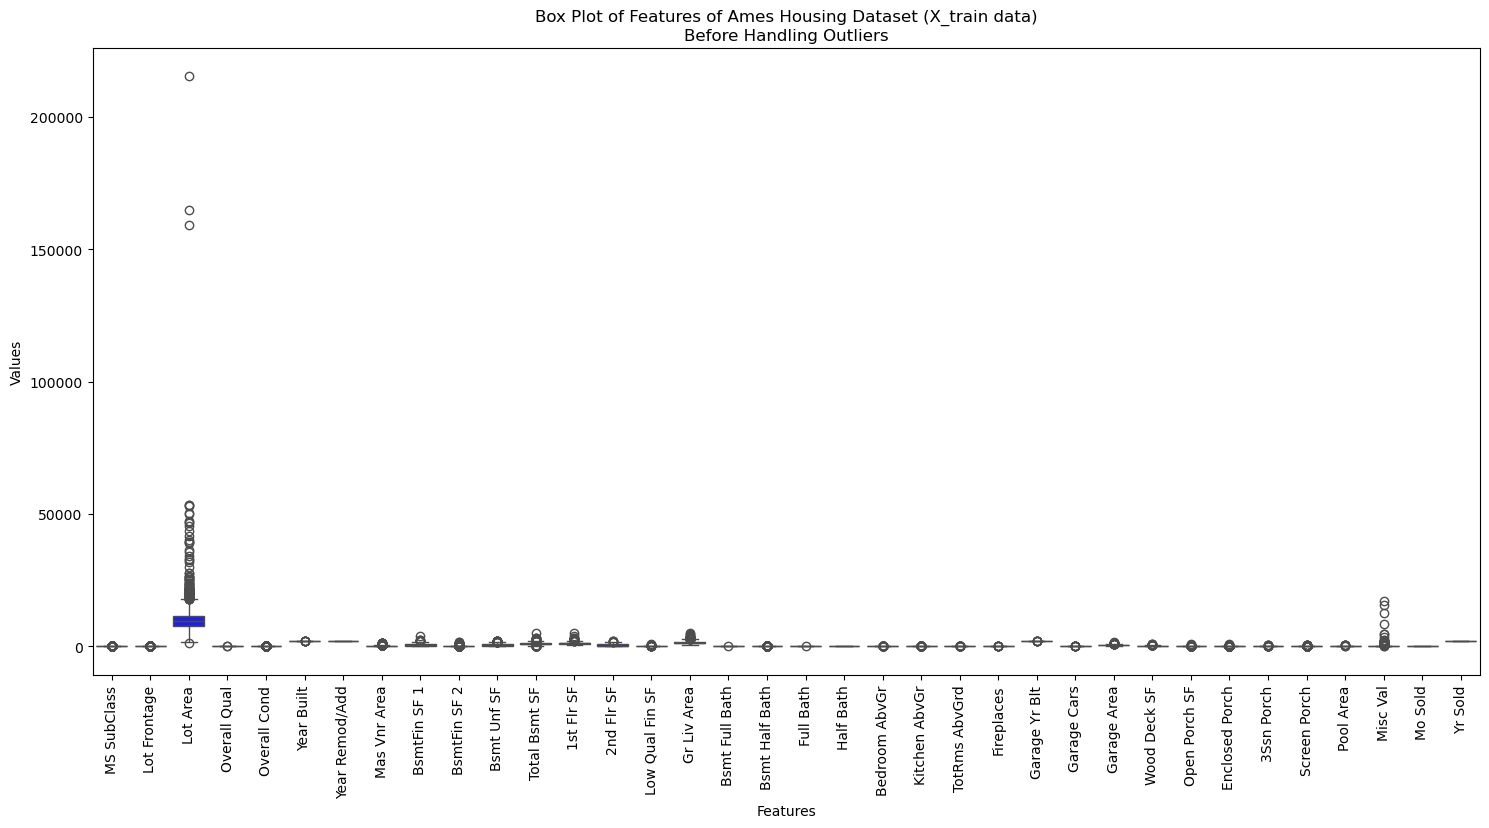

In [510]:
# Melt DataFrame
X_train_numeric_melted = pd.melt(X_train_numeric)

plt.figure(figsize=(15, 8)) 
sns.boxplot(data=X_train_numeric_melted, x='variable', y='value', color='blue')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Box Plot of Features of Ames Housing Dataset (X_train data)\nBefore Handling Outliers')
plt.show()

* **For X_val**

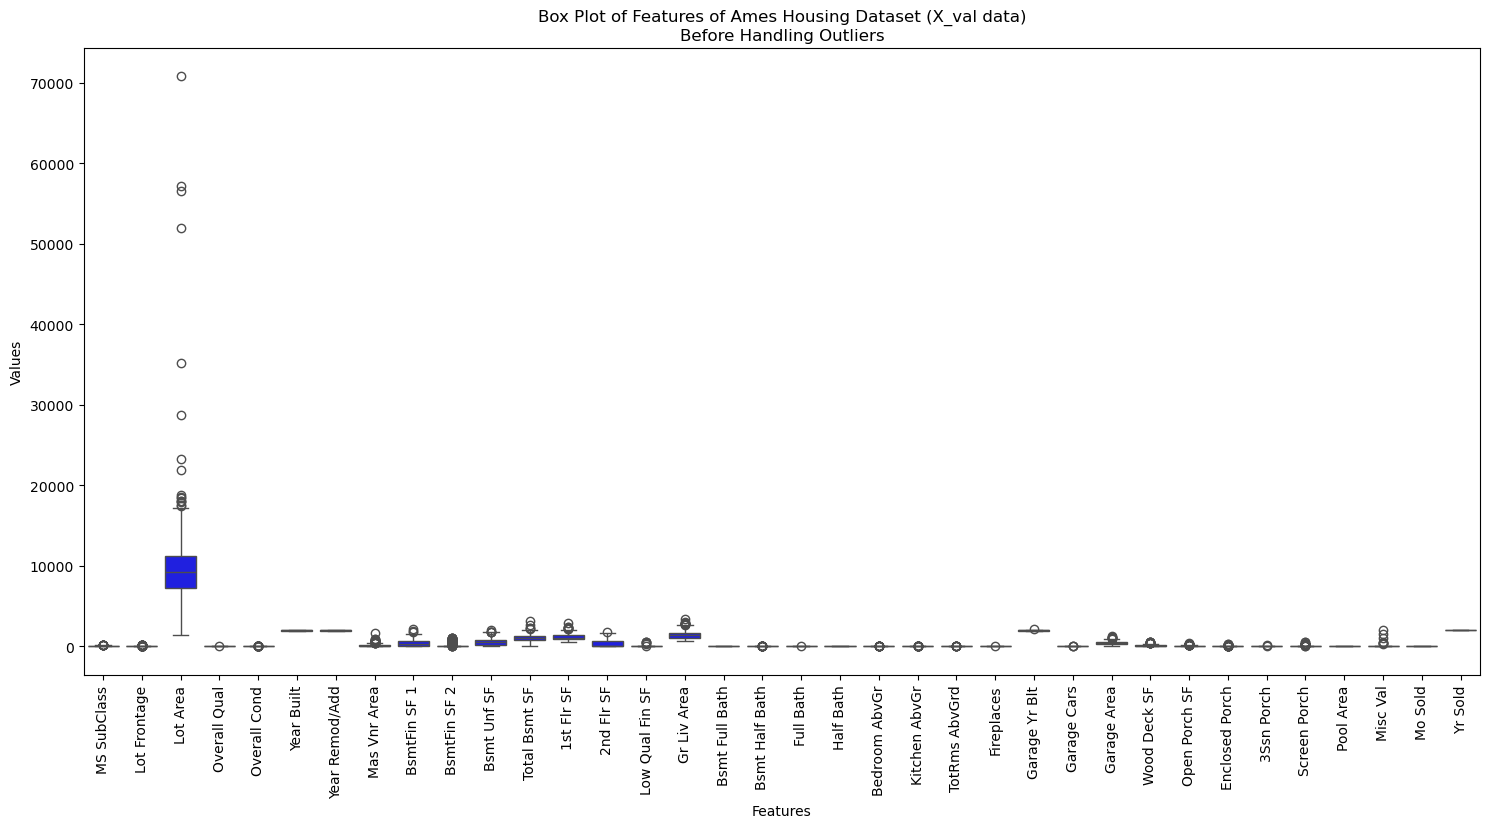

In [512]:
# Melt DataFrame
X_val_numeric_melted = pd.melt(X_val_numeric)

plt.figure(figsize=(15, 8)) 
sns.boxplot(data=X_val_numeric_melted, x='variable', y='value', color='blue')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Box Plot of Features of Ames Housing Dataset (X_val data)\nBefore Handling Outliers')
plt.show()

* **For X_test**

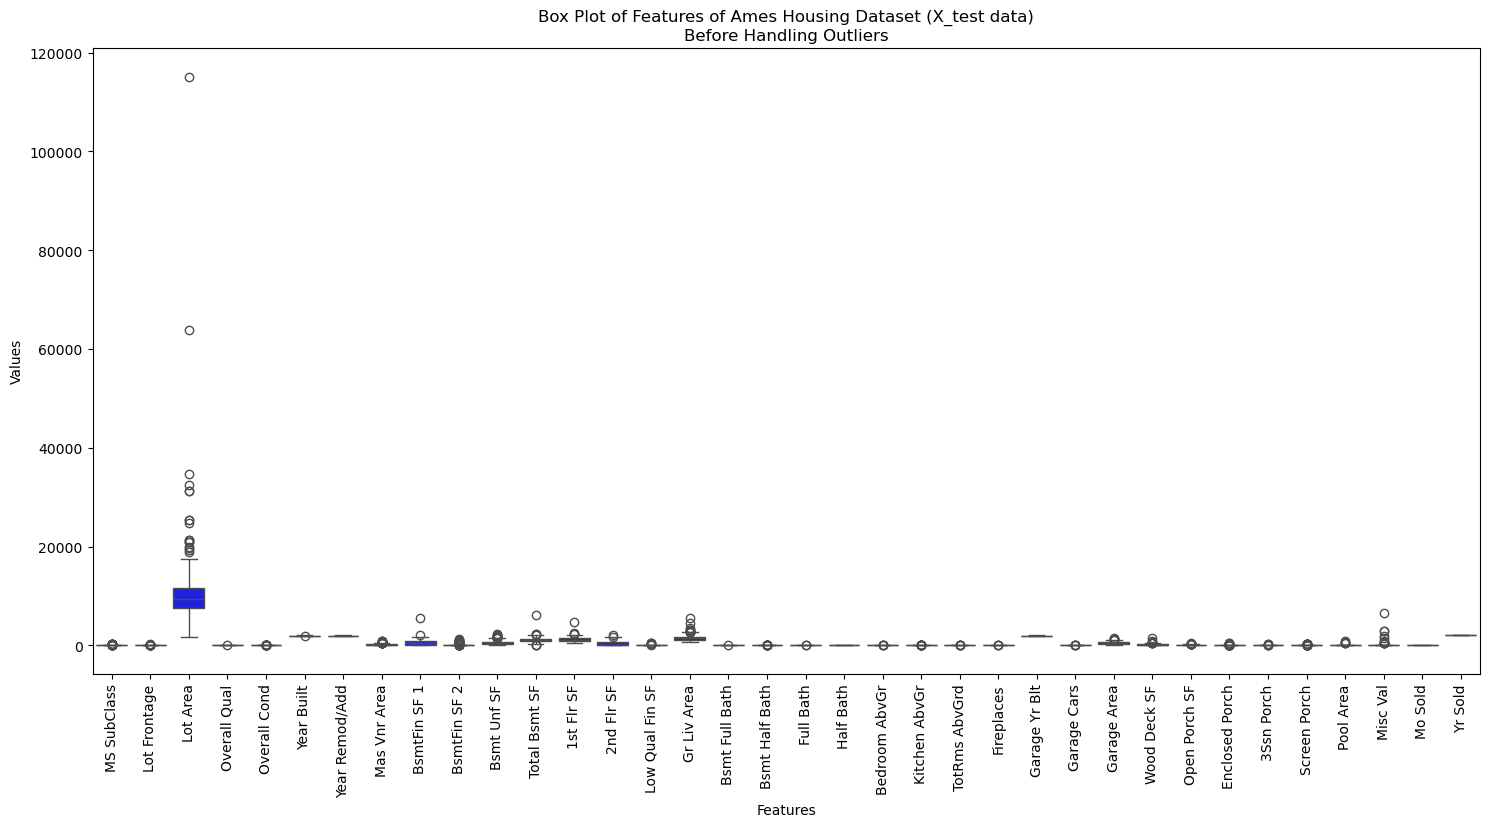

In [514]:
# Melt DataFrame
X_test_numeric_melted = pd.melt(X_test_numeric)

plt.figure(figsize=(15, 8)) 
sns.boxplot(data=X_test_numeric_melted, x='variable', y='value', color='blue')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Box Plot of Features of Ames Housing Dataset (X_test data)\nBefore Handling Outliers')
plt.show()

**Handling Outliers using Interquantile Range Method on 'any' of the Feature columns (using any(axis=1))**

**IsolationForest() did not significantly remove the outliers**

* **On  X_train_numeric**

In [517]:
Q1 = X_train_numeric.quantile(0.25)
Q3 = X_train_numeric.quantile(0.75)
IQR = Q3 - Q1
# Removing outliers
X_train_numeric_inliers_df = X_train_numeric[~((X_train_numeric < (Q1 - 1.5 * IQR)) | (X_train_numeric > (Q3 + 1.5 *IQR))).any(axis=1)]
print(X_train_numeric_inliers_df.shape)
print(X_train_numeric_inliers_df.isnull().sum())
print(X_train_numeric_inliers_df.head())

(805, 36)
MS SubClass        0
Lot Frontage       0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
dtype: int64
      MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
1495         60.0          72.0    7200.0           6.0           7.0   
2489         80.0          88.0    8471.0           6.0           7.0   
35

* **On X_val_numeric**

In [519]:
Q1 = X_val_numeric.quantile(0.25)
Q3 = X_val_numeric.quantile(0.75)
IQR = Q3 - Q1
# Removing outliers
X_val_numeric_inliers_df = (X_val_numeric[~((X_val_numeric < (Q1 - 1.5 * IQR)) | (X_val_numeric > (Q3 + 1.5 *IQR))).any(axis=1)])
print(X_val_numeric_inliers_df.shape)
print(X_val_numeric_inliers_df.isnull().sum())
print(X_val_numeric_inliers_df.head())

(166, 36)
MS SubClass        0
Lot Frontage       0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
dtype: int64
      MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
2390         60.0          82.0    9942.0           9.0           5.0   
1731         60.0          62.0    8857.0           6.0           5.0   
11

* **On  X_test_numeric**

In [521]:
Q1 = X_test_numeric.quantile(0.25)
Q3 = X_test_numeric.quantile(0.75)
IQR = Q3 - Q1
# Removing outliers
X_test_numeric_inliers_df = (X_test_numeric[~((X_test_numeric < (Q1 - 1.5 * IQR)) | (X_test_numeric > (Q3 + 1.5 *IQR))).any(axis=1)])
print(X_test_numeric_inliers_df.shape)
print(X_test_numeric_inliers_df.isnull().sum())
print(X_test_numeric_inliers_df.head())

(143, 36)
MS SubClass        0
Lot Frontage       0
Lot Area           0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Mas Vnr Area       0
BsmtFin SF 1       0
BsmtFin SF 2       0
Bsmt Unf SF        0
Total Bsmt SF      0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Bsmt Full Bath     0
Bsmt Half Bath     0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Yr Blt      0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
Mo Sold            0
Yr Sold            0
dtype: int64
      MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
1463         60.0          65.0    8158.0           7.0           5.0   
2417         60.0          96.0   11631.0           8.0           5.0   
27

**Filter out outliers from:**

* **X_train_category**

* **X_val_category**

* **X_test_category**

* **y_train**

* **y_val**

* **y_test**

**by using REINDEX Method and the index of the inliers.**

* **X_train_category**

In [524]:
X_train_category_inliers_df = X_train_category.reindex(X_train_numeric_inliers_df.index)

print(X_train_category_inliers_df.shape)

print(X_train_category_inliers_df.isnull().sum())

print(X_train_category_inliers_df.head())

(805, 37)
MS Zoning         0
Street            0
Lot Shape         0
Land Contour      0
Utilities         0
Lot Config        0
Land Slope        0
Neighborhood      0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Exter Qual        0
Exter Cond        0
Foundation        0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin Type 2    0
Heating           0
Heating QC        0
Central Air       0
Electrical        0
Kitchen Qual      0
Functional        0
Garage Type       0
Garage Finish     0
Garage Qual       0
Garage Cond       0
Paved Drive       0
Sale Type         0
Sale Condition    0
dtype: int64
     MS Zoning Street Lot Shape Land Contour Utilities Lot Config Land Slope  \
1495        RL   Pave       Reg          Lvl    AllPub     Inside        Gtl   
2489        RL   Pave       IR1          Lvl    AllPub     Corner        Gtl 

* **X_val_category**

In [526]:
X_val_category_inliers_df = X_val_category.reindex(X_val_numeric_inliers_df.index)

print(X_val_category_inliers_df.shape)

print(X_val_category_inliers_df.isnull().sum())

print(X_val_category_inliers_df.head())

(166, 37)
MS Zoning         0
Street            0
Lot Shape         0
Land Contour      0
Utilities         0
Lot Config        0
Land Slope        0
Neighborhood      0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Exter Qual        0
Exter Cond        0
Foundation        0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin Type 2    0
Heating           0
Heating QC        0
Central Air       0
Electrical        0
Kitchen Qual      0
Functional        0
Garage Type       0
Garage Finish     0
Garage Qual       0
Garage Cond       0
Paved Drive       0
Sale Type         0
Sale Condition    0
dtype: int64
     MS Zoning Street Lot Shape Land Contour Utilities Lot Config Land Slope  \
2390        RL   Pave       IR1          Lvl    AllPub     Inside        Gtl   
1731        RL   Pave       IR1          Lvl    AllPub     Inside        Gtl 

* **X_test_category**

In [528]:
X_test_category_inliers_df = X_test_category.reindex(X_test_numeric_inliers_df.index)

print(X_test_category_inliers_df.shape)

print(X_test_category_inliers_df.isnull().sum())

print(X_test_category_inliers_df.head())

(143, 37)
MS Zoning         0
Street            0
Lot Shape         0
Land Contour      0
Utilities         0
Lot Config        0
Land Slope        0
Neighborhood      0
Condition 1       0
Condition 2       0
Bldg Type         0
House Style       0
Roof Style        0
Roof Matl         0
Exterior 1st      0
Exterior 2nd      0
Exter Qual        0
Exter Cond        0
Foundation        0
Bsmt Qual         0
Bsmt Cond         0
Bsmt Exposure     0
BsmtFin Type 1    0
BsmtFin Type 2    0
Heating           0
Heating QC        0
Central Air       0
Electrical        0
Kitchen Qual      0
Functional        0
Garage Type       0
Garage Finish     0
Garage Qual       0
Garage Cond       0
Paved Drive       0
Sale Type         0
Sale Condition    0
dtype: int64
     MS Zoning Street Lot Shape Land Contour Utilities Lot Config Land Slope  \
1463        RL   Pave       Reg          Lvl    AllPub     Inside        Gtl   
2417        RL   Pave       IR1          Lvl    AllPub     Corner        Gtl 

* **y_train**

In [530]:
y_train_inliers_df = y_train.reindex(X_train_numeric_inliers_df.index)
print(y_train_inliers_df.shape)
print(y_train_inliers_df.isnull().sum())
print(y_train_inliers_df.head())

(805,)
0
1495    160500
2489    151000
358     181316
2046    126000
299     162500
Name: SalePrice, dtype: int64


* **y_val**

In [532]:
y_val_inliers_df = y_val.reindex(X_val_numeric_inliers_df.index)
print(y_val_inliers_df.shape)
print(y_val_inliers_df.isnull().sum())
print(y_val_inliers_df.head())

(166,)
0
2390    338500
1731    171925
1100    250000
1192    141000
1505    120000
Name: SalePrice, dtype: int64


* **y_test**

In [534]:
y_test_inliers_df = y_test.reindex(X_test_numeric_inliers_df.index)
print(y_test_inliers_df.shape)
print(y_test_inliers_df.isnull().sum())
print(y_test_inliers_df.head())

(143,)
0
1463    224900
2417    258000
2757    233555
1850    204000
464     184000
Name: SalePrice, dtype: int64


**Update:**

* **X_train**

* **X_val**

* **X_test**

* **y_train**

* **y_val**

* **y_test**

**First, we should concat numeric and category**

In [537]:
X_train = pd.concat([X_train_numeric_inliers_df, X_train_category_inliers_df], axis=1)
X_train.head()

MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
1495         60.0          72.0    7200.0           6.0           7.0   
2489         80.0          88.0    8471.0           6.0           7.0   
358          60.0          68.0    8803.0           6.0           5.0   
2046         50.0          60.0    8160.0           5.0           6.0   
299         120.0          35.0    3907.0           8.0           5.0   

      Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  \
1495      1976.0          2001.0           0.0         288.0           0.0   
2489      1977.0          1995.0          46.0         506.0           0.0   
358       1994.0          1995.0           0.0         600.0           0.0   
2046      1940.0          1950.0           0.0         312.0           0.0   
299       1989.0          1989.0           0.0          76.0           0.0   

      ...  Electrical  Kitchen Qual  Functional  Garage Type  Garage Finish  \
1495  ...       SBrkr            TA         Typ       Attchd            Fin   
2489  ...       SBrkr            TA         Typ       Attchd            Unf   
358   ...       SBrkr            Gd         Typ       Attchd            Fin   
2046  ...       FuseF            TA         Typ       Detchd            Unf   
299   ...       SBrkr            Gd         Typ       Attchd            Unf   

      Garage Qual  Garage Cond  Paved Drive  Sale Type  Sale Condition  
1495           TA           TA            Y        WD           Normal  
2489           TA           TA            Y        WD           Normal  
358            TA           TA            Y        WD           Normal  
2046           TA           TA            P        WD          AdjLand  
299            TA           TA            Y        WD           Normal  

[5 rows x 73 columns]

In [538]:
X_val = pd.concat([X_val_numeric_inliers_df, X_val_category_inliers_df], axis=1)
X_val.head()

MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
2390         60.0          82.0    9942.0           9.0           5.0   
1731         60.0          62.0    8857.0           6.0           5.0   
1100         60.0          84.0   14260.0           8.0           5.0   
1192         60.0          73.0    8814.0           5.0           6.0   
1505         50.0          60.0   12180.0           5.0           7.0   

      Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  \
2390      2005.0          2006.0         385.0        1290.0           0.0   
1731      2006.0          2006.0           0.0           0.0           0.0   
1100      2000.0          2000.0         350.0         655.0           0.0   
1192      1968.0          1968.0           0.0         732.0           0.0   
1505      1938.0          2007.0           0.0           0.0           0.0   

      ...  Electrical  Kitchen Qual  Functional  Garage Type  Garage Finish  \
2390  ...       SBrkr            Ex         Typ       Attchd            RFn   
1731  ...       SBrkr            Gd         Typ       Attchd            RFn   
1100  ...       SBrkr            Gd         Typ       Attchd            RFn   
1192  ...       SBrkr            TA         Typ       Attchd            Unf   
1505  ...       FuseF            Ex         Typ       Attchd            Unf   

      Garage Qual  Garage Cond  Paved Drive  Sale Type  Sale Condition  
2390           TA           TA            Y        New         Partial  
1731           TA           TA            Y        New         Partial  
1100           TA           TA            Y        WD           Normal  
1192           TA           TA            Y        WD           Normal  
1505           TA           TA            N        WD           Family  

[5 rows x 73 columns]

In [539]:
X_test = pd.concat([X_test_numeric_inliers_df, X_test_category_inliers_df], axis=1)
X_test.head()

MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
1463         60.0          65.0    8158.0           7.0           5.0   
2417         60.0          96.0   11631.0           8.0           5.0   
2757         20.0          90.0   13377.0           6.0           5.0   
1850         20.0          73.0    7321.0           7.0           5.0   
464          60.0          63.0   10928.0           7.0           5.0   

      Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  \
1463      2003.0          2003.0         252.0         550.0           0.0   
2417      2004.0          2005.0         236.0           0.0           0.0   
2757      2006.0          2006.0           0.0        1576.0           0.0   
1850      1999.0          2000.0           0.0           0.0           0.0   
464       2005.0          2005.0           0.0           0.0           0.0   

      ...  Electrical  Kitchen Qual  Functional  Garage Type  Garage Finish  \
1463  ...       SBrkr            Gd         Typ       Attchd            RFn   
2417  ...       SBrkr            Gd         Typ      BuiltIn            Fin   
2757  ...       SBrkr            Gd         Typ       Attchd            RFn   
1850  ...       SBrkr            Gd         Typ       Detchd            Unf   
464   ...       SBrkr            Gd         Typ       Attchd            Fin   

      Garage Qual  Garage Cond  Paved Drive  Sale Type  Sale Condition  
1463           TA           TA            Y        WD           Normal  
2417           TA           TA            Y        New         Partial  
2757           TA           TA            Y        New         Partial  
1850           TA           TA            Y        COD          Normal  
464            TA           TA            Y        WD           Normal  

[5 rows x 73 columns]

In [540]:
y_train = y_train_inliers_df
y_train.head()

1495    160500
2489    151000
358     181316
2046    126000
299     162500
Name: SalePrice, dtype: int64

In [541]:
y_val = y_val_inliers_df
y_val.head()

2390    338500
1731    171925
1100    250000
1192    141000
1505    120000
Name: SalePrice, dtype: int64

In [542]:
y_test = y_test_inliers_df
y_test.head()

1463    224900
2417    258000
2757    233555
1850    204000
464     184000
Name: SalePrice, dtype: int64

* **Check shape**

In [544]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(805, 73)
(166, 73)
(143, 73)
(805,)
(166,)
(143,)


**Box Plot Visualization After Handling Outliers:**

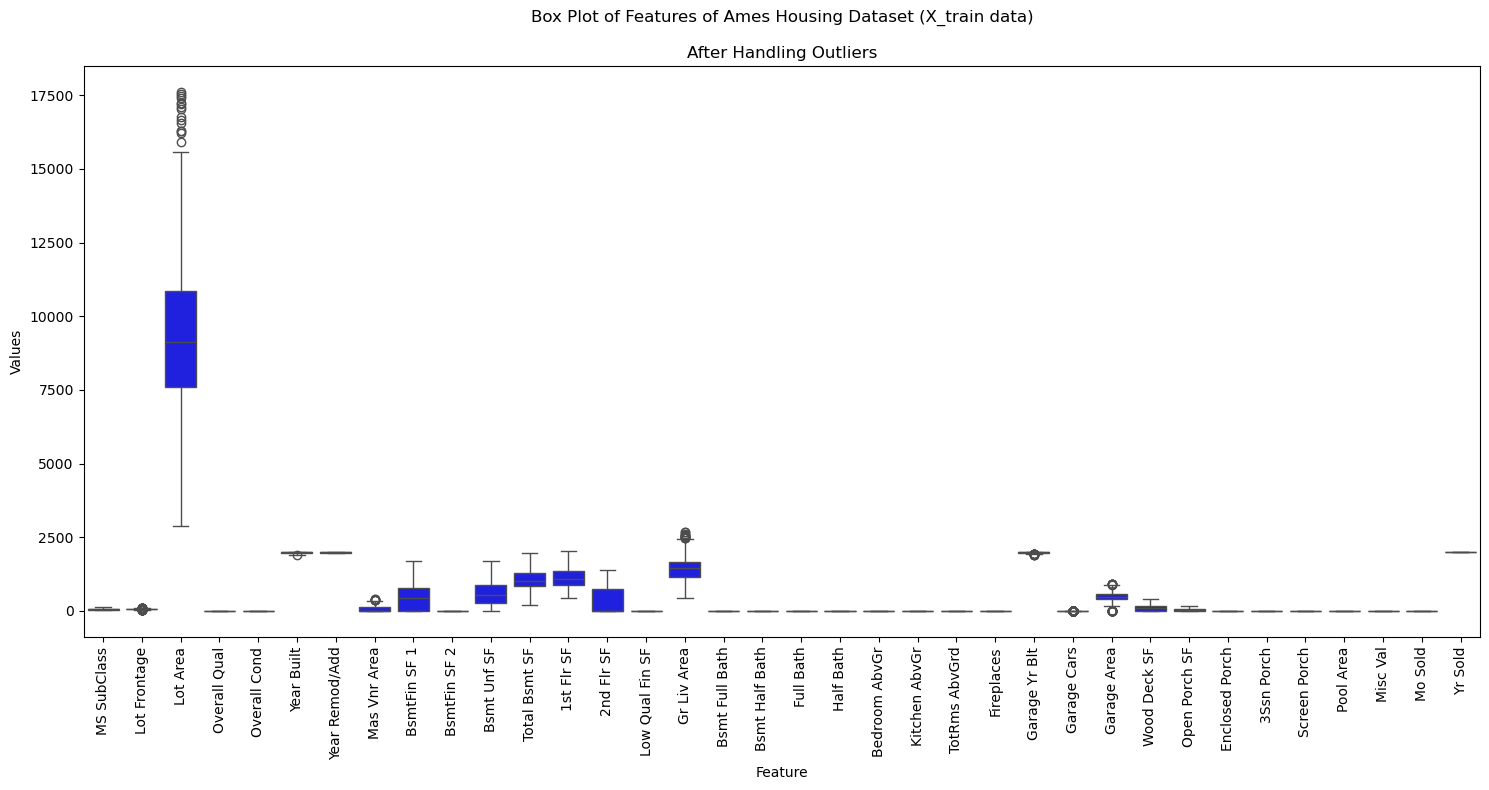

In [546]:
# Melt DataFrame
X_train_numeric_melted = pd.melt(X_train_numeric_inliers_df)

plt.figure(figsize=(15,8))
sns.boxplot(data=X_train_numeric_melted, x='variable', y='value', color='blue')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Values')
plt.title('Box Plot of Features of Ames Housing Dataset (X_train data)\n\nAfter Handling Outliers')
plt.tight_layout()
plt.show()

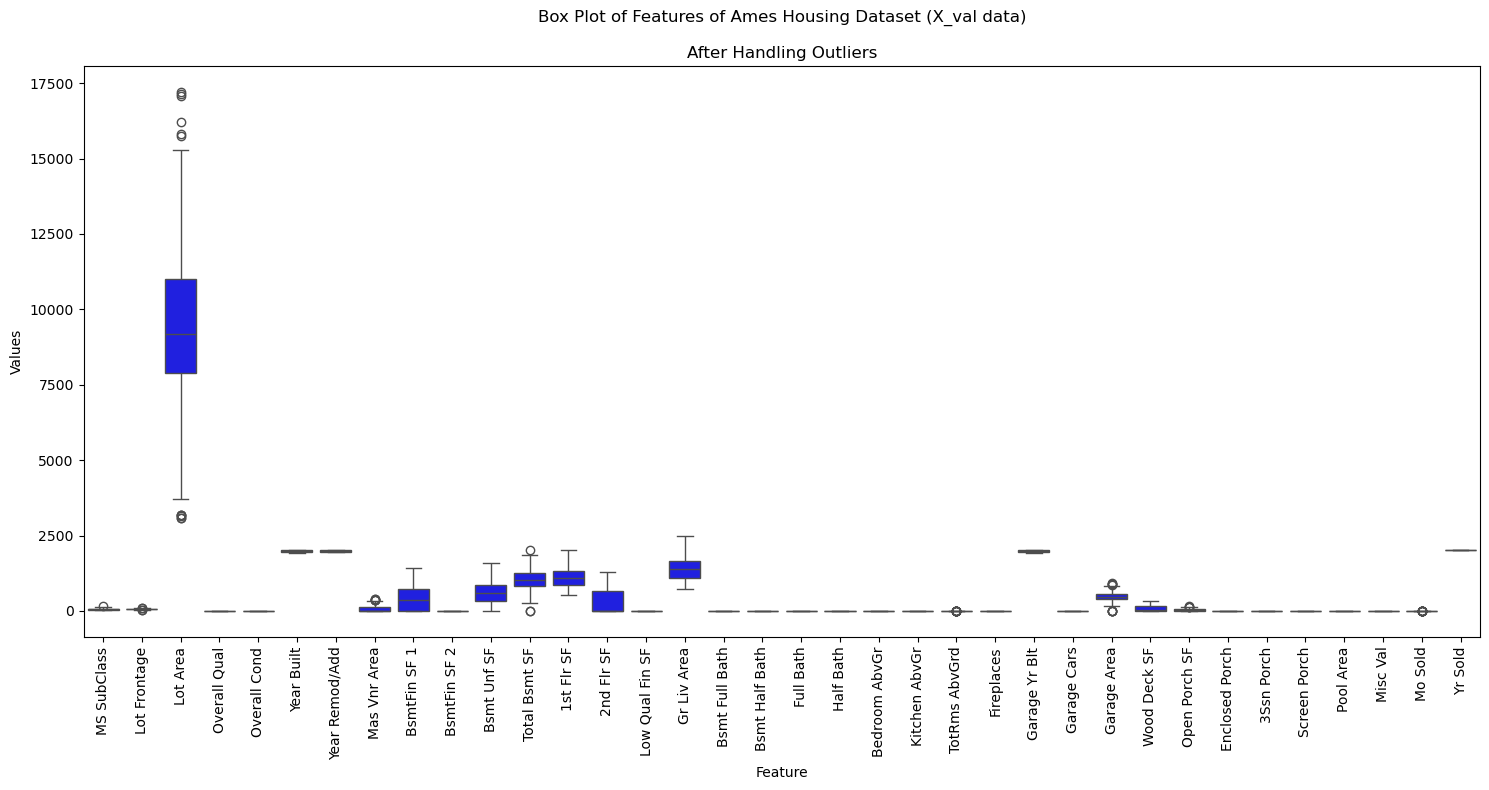

In [547]:
# Melt DataFrame
X_val_numeric_melted = pd.melt(X_val_numeric_inliers_df)

plt.figure(figsize=(15,8))
sns.boxplot(data=X_val_numeric_melted, x='variable', y='value', color='blue')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Values')
plt.title('Box Plot of Features of Ames Housing Dataset (X_val data)\n\nAfter Handling Outliers')
plt.tight_layout()
plt.show()

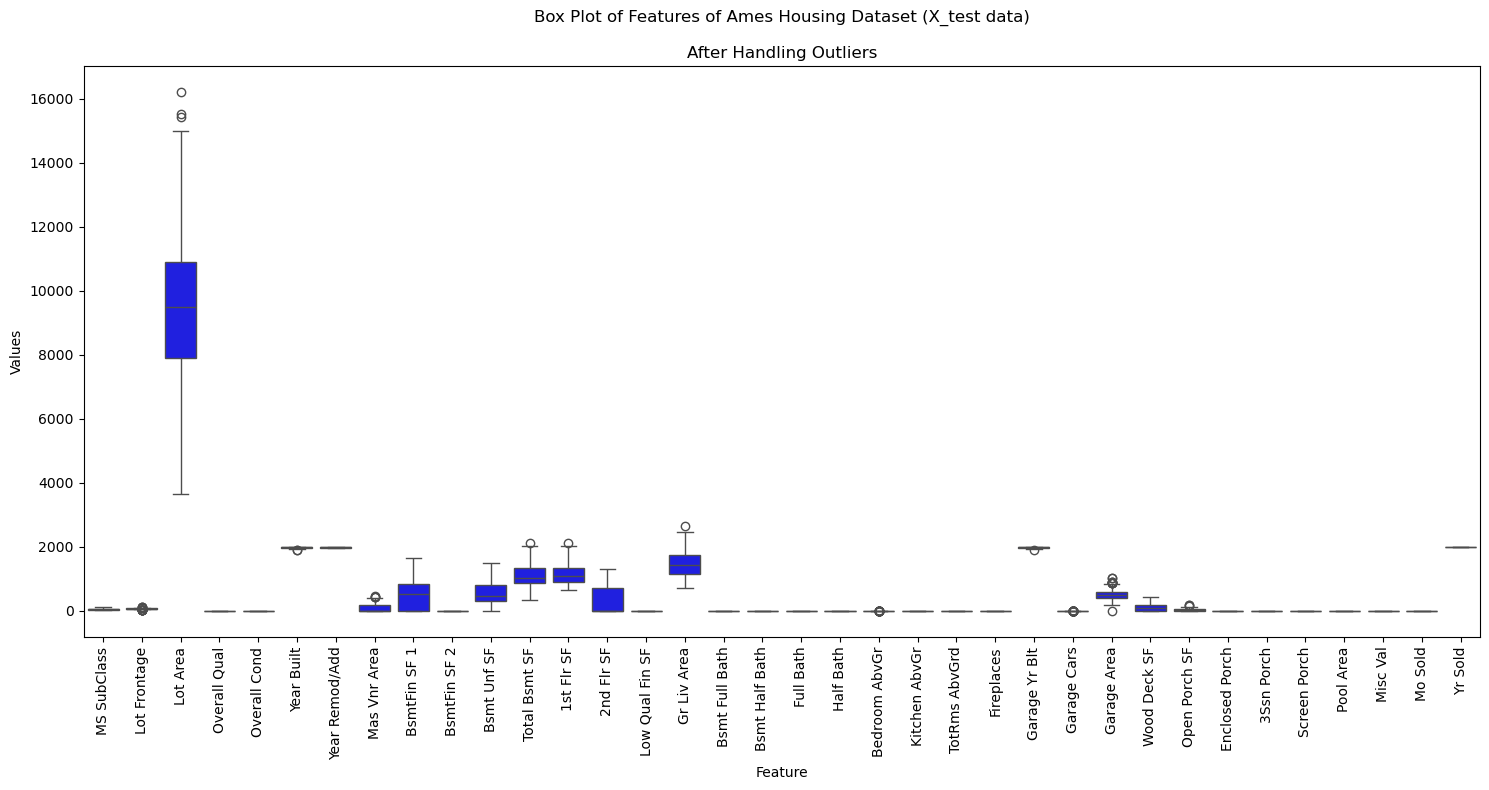

In [548]:
# Melt DataFrame
X_test_numeric_melted = pd.melt(X_test_numeric_inliers_df)

plt.figure(figsize=(15,8))
sns.boxplot(data=X_test_numeric_melted, x='variable', y='value', color='blue')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Values')
plt.title('Box Plot of Features of Ames Housing Dataset (X_test data)\n\nAfter Handling Outliers')
plt.tight_layout()
plt.show()

**Scale Numerical data using StandardScaler()**

**We will be scaling for X_train_numeric_inliers_df, X_val_numeric_inliers_df, and X_test_numeric_inliers_df**

**Instatiate the StandardScaler(), ie. create an object for StandardScaler()**

In [552]:
scaler = StandardScaler()

# Train and transform X_train_numeric 
X_train_numeric_scaled = scaler.fit_transform(X_train_numeric_inliers_df)

# Transform (scale) X_val_numeric_inliers_df using scaler
X_val_numeric_scaled = scaler.transform(X_val_numeric_inliers_df)

# Transform (scale) X_test_numeric_inliers_df using scaler
X_test_numeric_scaled = scaler.transform(X_test_numeric_inliers_df)

**Convert X_train_numeric_scaled and X_test_numeric_scaled back to dataframes**

**(Notice that we passed the original index (generated after train test split) to the converted dataframes, to avoid future mismatch)**
**Otherwise, these new datframes will have their index reset which we don't want.**

In [554]:
X_train_numeric_scaled = pd.DataFrame(X_train_numeric_scaled, columns=X_train_numeric_inliers_df.columns, index=X_train.index)
X_val_numeric_scaled = pd.DataFrame(X_val_numeric_scaled, columns=X_val_numeric_inliers_df.columns, index=X_val.index)
X_test_numeric_scaled = pd.DataFrame(X_test_numeric_scaled, columns=X_test_numeric_inliers_df.columns, index=X_test.index)

print(X_train_numeric_scaled.head())
print('*****' * 15)

print(X_val_numeric_scaled.head())
print('*****' * 15)

print(X_test_numeric_scaled.head())

      MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
1495     0.346670      0.283677 -0.755255     -0.257700      2.396494   
2489     0.991173      1.477328 -0.292916     -0.257700      2.396494   
358      0.346670     -0.014735 -0.172148     -0.257700     -0.504525   
2046     0.024419     -0.611561 -0.406046     -1.023193      0.945984   
299      2.280177     -2.476640 -1.953115      1.273285     -0.504525   

      Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  \
1495   -0.330201        0.564565     -0.703955     -0.367697           0.0   
2489   -0.290463        0.257522     -0.257961      0.157683           0.0   
358     0.385095        0.257522     -0.703955      0.384223           0.0   
2046   -1.760793       -2.045301     -0.703955     -0.309857           0.0   
299     0.186402       -0.049521     -0.703955     -0.878617           0.0   

      ...  Garage Area  Wood Deck SF  Open Porch SF  Enclosed Porch  \
1495  ...    -0.22927

**Encoding for categorical data using OneHotEncoding()**

**We will be encoding for X_train_category_inliers_df, X_val_category_inliers_df, and X_test_category_inliers_df**

**Instantiate OneHotEncoder(), ie. create object for OneHotEncoder()**

In [558]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Train and transform X_train_category
X_train_category_encoded = ohe.fit_transform(X_train_category_inliers_df)
# Transform X_val_category with the trained model
X_val_category_encoded = ohe.transform(X_val_category_inliers_df)
# Transform X_test_category with the trained model
X_test_category_encoded = ohe.transform(X_test_category_inliers_df)

In [559]:
print(X_train_category_encoded)
print('*****' * 10)
print(X_val_category_encoded)
print('*****' * 10)
print(X_test_category_encoded)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
**************************************************
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
**************************************************
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


**Convert encoded data from arrays back to dataframes**

In [561]:
X_train_category_encoded_df = pd.DataFrame(X_train_category_encoded, columns=ohe.get_feature_names_out(), index=X_train.index)
X_val_category_encoded_df =pd.DataFrame(X_val_category_encoded, columns=ohe.get_feature_names_out(), index=X_val.index)
X_test_category_encoded_df =pd.DataFrame(X_test_category_encoded, columns=ohe.get_feature_names_out(), index=X_test.index)
print(X_train_category_encoded_df.head())
print('*****' * 15)
print(X_val_category_encoded_df.head())
print('*****' * 15)
print(X_test_category_encoded_df.head())

      MS Zoning_C (all)  MS Zoning_FV  MS Zoning_RH  MS Zoning_RL  \
1495                0.0           0.0           0.0           1.0   
2489                0.0           0.0           0.0           1.0   
358                 0.0           0.0           0.0           1.0   
2046                0.0           0.0           0.0           1.0   
299                 0.0           0.0           0.0           0.0   

      MS Zoning_RM  Street_Grvl  Street_Pave  Lot Shape_IR1  Lot Shape_IR2  \
1495           0.0          0.0          1.0            0.0            0.0   
2489           0.0          0.0          1.0            1.0            0.0   
358            0.0          0.0          1.0            1.0            0.0   
2046           0.0          0.0          1.0            0.0            0.0   
299            1.0          0.0          1.0            1.0            0.0   

      Lot Shape_IR3  ...  Sale Type_ConLI  Sale Type_ConLw  Sale Type_New  \
1495            0.0  ...              0

**Check Shapes**

In [563]:
print(X_train_category_encoded_df.shape)
print(X_val_category_encoded_df.shape)
print(X_test_category_encoded_df.shape)

(805, 179)
(166, 179)
(143, 179)


In [564]:
print(X_train_numeric_scaled.shape)
print(X_val_numeric_scaled.shape)
print(X_test_numeric_scaled.shape)

(805, 36)
(166, 36)
(143, 36)


**Check if there are Missing Values after Encoding**- There are no Missing Values

In [566]:
print(X_train_category_encoded_df.isnull().sum())
print('*****' * 5)
print(X_val_category_encoded_df.isnull().sum())
print('*****' * 5)
print(X_test_category_encoded_df.isnull().sum())

MS Zoning_C (all)         0
MS Zoning_FV              0
MS Zoning_RH              0
MS Zoning_RL              0
MS Zoning_RM              0
                         ..
Sale Condition_Abnorml    0
Sale Condition_AdjLand    0
Sale Condition_Family     0
Sale Condition_Normal     0
Sale Condition_Partial    0
Length: 179, dtype: int64
*************************
MS Zoning_C (all)         0
MS Zoning_FV              0
MS Zoning_RH              0
MS Zoning_RL              0
MS Zoning_RM              0
                         ..
Sale Condition_Abnorml    0
Sale Condition_AdjLand    0
Sale Condition_Family     0
Sale Condition_Normal     0
Sale Condition_Partial    0
Length: 179, dtype: int64
*************************
MS Zoning_C (all)         0
MS Zoning_FV              0
MS Zoning_RH              0
MS Zoning_RL              0
MS Zoning_RM              0
                         ..
Sale Condition_Abnorml    0
Sale Condition_AdjLand    0
Sale Condition_Family     0
Sale Condition_Normal     0


**Update X_train, X_val, and X-test**

**Concat (X_train_numeric_scaled with X_train_category_encoded_df**

In [569]:
X_train = pd.concat([X_train_numeric_scaled, X_train_category_encoded_df], axis=1)
X_train.head()

MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
1495     0.346670      0.283677 -0.755255     -0.257700      2.396494   
2489     0.991173      1.477328 -0.292916     -0.257700      2.396494   
358      0.346670     -0.014735 -0.172148     -0.257700     -0.504525   
2046     0.024419     -0.611561 -0.406046     -1.023193      0.945984   
299      2.280177     -2.476640 -1.953115      1.273285     -0.504525   

      Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  \
1495   -0.330201        0.564565     -0.703955     -0.367697           0.0   
2489   -0.290463        0.257522     -0.257961      0.157683           0.0   
358     0.385095        0.257522     -0.703955      0.384223           0.0   
2046   -1.760793       -2.045301     -0.703955     -0.309857           0.0   
299     0.186402       -0.049521     -0.703955     -0.878617           0.0   

      ...  Sale Type_ConLI  Sale Type_ConLw  Sale Type_New  Sale Type_Oth  \
1495  ...              0.0              0.0            0.0            0.0   
2489  ...              0.0              0.0            0.0            0.0   
358   ...              0.0              0.0            0.0            0.0   
2046  ...              0.0              0.0            0.0            0.0   
299   ...              0.0              0.0            0.0            0.0   

      Sale Type_WD   Sale Condition_Abnorml  Sale Condition_AdjLand  \
1495            1.0                     0.0                     0.0   
2489            1.0                     0.0                     0.0   
358             1.0                     0.0                     0.0   
2046            1.0                     0.0                     1.0   
299             1.0                     0.0                     0.0   

      Sale Condition_Family  Sale Condition_Normal  Sale Condition_Partial  
1495                    0.0                    1.0                     0.0  
2489                    0.0                    1.0                     0.0  
358                     0.0                    1.0                     0.0  
2046                    0.0                    0.0                     0.0  
299                     0.0                    1.0                     0.0  

[5 rows x 215 columns]

**Concat (X_val_numeric_scaled with X_val_category_encoded_df**

In [571]:
X_val = pd.concat([X_val_numeric_scaled, X_val_category_encoded_df], axis=1)
X_val.head()

MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
2390     0.346670      1.029709  0.242174      2.038778     -0.504525   
1731     0.346670     -0.462354 -0.152505     -0.257700     -0.504525   
1100     0.346670      1.178916  1.812888      1.273285     -0.504525   
1192     0.346670      0.358281 -0.168147     -1.023193      0.945984   
1505     0.024419     -0.611561  1.056268     -1.023193      2.396494   

      Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  \
2390    0.822220        0.820434      3.028819      2.047123           0.0   
1731    0.861959        0.820434     -0.703955     -1.061777           0.0   
1100    0.623527        0.513391      2.689476      0.516773           0.0   
1192   -0.648111       -1.124172     -0.703955      0.702343           0.0   
1505   -1.840271        0.871608     -0.703955     -1.061777           0.0   

      ...  Sale Type_ConLI  Sale Type_ConLw  Sale Type_New  Sale Type_Oth  \
2390  ...              0.0              0.0            1.0            0.0   
1731  ...              0.0              0.0            1.0            0.0   
1100  ...              0.0              0.0            0.0            0.0   
1192  ...              0.0              0.0            0.0            0.0   
1505  ...              0.0              0.0            0.0            0.0   

      Sale Type_WD   Sale Condition_Abnorml  Sale Condition_AdjLand  \
2390            0.0                     0.0                     0.0   
1731            0.0                     0.0                     0.0   
1100            1.0                     0.0                     0.0   
1192            1.0                     0.0                     0.0   
1505            1.0                     0.0                     0.0   

      Sale Condition_Family  Sale Condition_Normal  Sale Condition_Partial  
2390                    0.0                    0.0                     1.0  
1731                    0.0                    0.0                     1.0  
1100                    0.0                    1.0                     0.0  
1192                    0.0                    1.0                     0.0  
1505                    1.0                    0.0                     0.0  

[5 rows x 215 columns]

**Concat (X_test_numeric_scaled with X_test_category_encoded_df**

In [573]:
X_test = pd.concat([X_test_numeric_scaled, X_test_category_encoded_df], axis=1)
X_test.head()

MS SubClass  Lot Frontage  Lot Area  Overall Qual  Overall Cond  \
1463     0.346670     -0.238545 -0.406773      0.507793     -0.504525   
2417     0.346670      2.074154  0.856564      1.273285     -0.504525   
2757    -0.942334      1.626535  1.491688     -0.257700     -0.504525   
1850    -0.942334      0.358281 -0.711240      0.507793     -0.504525   
464      0.346670     -0.387751  0.600841      0.507793     -0.504525   

      Year Built  Year Remod/Add  Mas Vnr Area  BsmtFin SF 1  BsmtFin SF 2  \
1463    0.742743        0.666913      1.739316      0.263723           0.0   
2417    0.782482        0.769260      1.584187     -1.061777           0.0   
2757    0.861959        0.820434     -0.703955      2.736383           0.0   
1850    0.583788        0.513391     -0.703955     -1.061777           0.0   
464     0.822220        0.769260     -0.703955     -1.061777           0.0   

      ...  Sale Type_ConLI  Sale Type_ConLw  Sale Type_New  Sale Type_Oth  \
1463  ...              0.0              0.0            0.0            0.0   
2417  ...              0.0              0.0            1.0            0.0   
2757  ...              0.0              0.0            1.0            0.0   
1850  ...              0.0              0.0            0.0            0.0   
464   ...              0.0              0.0            0.0            0.0   

      Sale Type_WD   Sale Condition_Abnorml  Sale Condition_AdjLand  \
1463            1.0                     0.0                     0.0   
2417            0.0                     0.0                     0.0   
2757            0.0                     0.0                     0.0   
1850            0.0                     0.0                     0.0   
464             1.0                     0.0                     0.0   

      Sale Condition_Family  Sale Condition_Normal  Sale Condition_Partial  
1463                    0.0                    1.0                     0.0  
2417                    0.0                    0.0                     1.0  
2757                    0.0                    0.0                     1.0  
1850                    0.0                    1.0                     0.0  
464                     0.0                    1.0                     0.0  

[5 rows x 215 columns]

**Feature Selection Using:**

* **mutual_info-regession()- Calculation for mutual_info_scores of Features**

* **Wrapper Method: RandomForestRegressor() as Estimator and Recursive Feature Elimination(RFE) as Selector**

**We need a unified X to perform these steps, thus the need to concat X_train, X_val, and X_test**

**We also need a unified y, thus the need to concat y_train, y_val, and y_test**

In [575]:
X_unified = pd.concat([X_train, X_val, X_test], axis=0)
X_unified.shape

(1114, 215)

In [576]:
y_unified = pd.concat([y_train, y_val, y_test], axis=0)
y_unified.shape

(1114,)

* **mutual_info-regession()- Calculation for mutual_info_scores of Features**

In [578]:
mutual_info_scores = mutual_info_regression(X_unified, y_unified)

**Create a dataframe showing both Features and their mutual_info_scores. Sort from highest scores to the lowest, and retrieving only 30 Features.**

In [580]:
mutual_info_df = pd.DataFrame({'Feature': X_unified.columns, 'Scores': mutual_info_scores}).sort_values(by='Scores', ascending=False)
mutual_info_df.head(30)

Feature    Scores
3            Overall Qual  0.676271
15            Gr Liv Area  0.506171
5              Year Built  0.504398
26            Garage Area  0.490191
25            Garage Cars  0.459829
24          Garage Yr Blt  0.437371
11          Total Bsmt SF  0.421441
18              Full Bath  0.378176
6          Year Remod/Add  0.371879
12             1st Flr SF  0.326114
133         Exter Qual_TA  0.300700
0             MS SubClass  0.282862
188     Garage Finish_Unf  0.281340
139      Foundation_PConc  0.277989
132         Exter Qual_Gd  0.265356
13             2nd Flr SF  0.262236
145          Bsmt Qual_TA  0.258126
22          TotRms AbvGrd  0.248929
10            Bsmt Unf SF  0.236470
143          Bsmt Qual_Gd  0.232873
28          Open Porch SF  0.223691
176       Kitchen Qual_TA  0.221405
138     Foundation_CBlock  0.210903
1            Lot Frontage  0.201912
175       Kitchen Qual_Gd  0.194614
8            BsmtFin SF 1  0.185807
7            Mas Vnr Area  0.176814
164         Heating QC_Ex  0.173128
114  Exterior 1st_VinylSd  0.149133
4            Overall Cond  0.141920

**Update X_unified with the 30 Features with the highest mutual_info_scores**

In [582]:
X_unified_30 = pd.DataFrame(X_unified, columns=['Overall Qual', 'Year Built', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Garage Yr Blt', 'Total Bsmt SF', 'Full Bath', 'Year Remod/Add', '1st Flr SF', 'Exter Qual_TA', 'MS SubClass', 'Garage Finish_Unf', 'Exter Qual_Gd', 'Foundation_PConc', '2nd Flr SF', 'Bsmt Qual_TA', 'TotRms AbvGrd', 'Bsmt Unf SF', 'Bsmt Qual_Gd', 'Open Porch SF', 'Kitchen Qual_TA', 'Foundation_CBlock', 'Lot Frontage', 'Kitchen Qual_Gd', 'Mas Vnr Area', 'BsmtFin SF 1', 'Heating QC_Ex', 'Exterior 1st_VinylSd', 'Overall Cond'])
X_unified_30.head()

Overall Qual  Year Built  Gr Liv Area  Garage Area  Garage Cars  \
1495     -0.257700   -0.330201    -0.131832    -0.229272     0.211493   
2489     -0.257700   -0.290463    -0.597522     0.047117     0.211493   
358      -0.257700    0.385095     0.163606    -0.394043     0.211493   
2046     -1.023193   -1.760793    -0.792811    -1.292307    -1.231317   
299       1.273285    0.186402    -0.650100     0.254409     0.211493   

      Garage Yr Blt  Total Bsmt SF  Full Bath  Year Remod/Add  1st Flr SF  \
1495      -0.501862      -1.193637  -1.268985        0.564565   -1.440315   
2489      -0.410273      -1.748926  -1.268985        0.257522    0.296975   
358        0.322438      -1.121886   0.718433        0.257522   -1.364638   
2046      -2.150462      -0.969026  -1.268985       -2.045301   -1.203412   
299        0.093466       0.388001   0.718433       -0.049521    0.227878   

      ...  Open Porch SF  Kitchen Qual_TA  Foundation_CBlock  Lot Frontage  \
1495  ...      -0.971883              1.0                1.0      0.283677   
2489  ...      -0.711116              1.0                1.0      1.477328   
358   ...       0.027723              0.0                0.0     -0.014735   
2046  ...      -0.971883              1.0                0.0     -0.611561   
299   ...       0.788293              0.0                1.0     -2.476640   

      Kitchen Qual_Gd  Mas Vnr Area  BsmtFin SF 1  Heating QC_Ex  \
1495              0.0     -0.703955     -0.367697            0.0   
2489              0.0     -0.257961      0.157683            0.0   
358               1.0     -0.703955      0.384223            0.0   
2046              0.0     -0.703955     -0.309857            0.0   
299               1.0     -0.703955     -0.878617            0.0   

      Exterior 1st_VinylSd  Overall Cond  
1495                   0.0      2.396494  
2489                   0.0      2.396494  
358                    0.0     -0.504525  
2046                   0.0      0.945984  
299                    0.0     -0.504525  

[5 rows x 30 columns]

In [583]:
X_unified_30.shape

(1114, 30)

* **Wrapper Method: RandomForestRegressor() as Estimator and Recursive Feature Elimination(RFE) as Selector**

In [585]:
estimator = RandomForestRegressor(n_estimators=100, random_state=42)
selector = RFE(estimator, n_features_to_select=15, step=1)
X_unified_15 = selector.fit_transform(X_unified_30, y_unified)
X_unified_15

array([[-0.25770005, -0.33020123, -0.13183192, ..., -0.97188274,
         0.28367744, -0.36769719],
       [-0.25770005, -0.29046255, -0.59752173, ..., -0.71111593,
         1.47732833,  0.15768288],
       [-0.25770005,  0.3850949 ,  0.1636057 , ...,  0.02772334,
        -0.01473529,  0.38422291],
       ...,
       [ 1.27328549,  0.82222031,  1.13504464, ...,  0.33195128,
         0.4328838 ,  0.25408289],
       [-0.25770005,  0.74274296,  0.69439192, ...,  0.24502901,
        -0.31314801,  0.15045288],
       [-0.25770005,  0.82222031, -0.23198027, ..., -0.18958233,
        -1.58140208,  0.95298298]])

**Convert the array output of X_unified_15 back to a dataframe.**

**Meanwhile, use the [selector.support_] to identify which columns list were selected by the selector**

In [587]:
X_unified_15_df = pd.DataFrame(X_unified_15, columns=X_unified_30.columns[selector.support_])
X_unified_15_df.head()

Overall Qual  Year Built  Gr Liv Area  Garage Area  Garage Cars  \
0     -0.257700   -0.330201    -0.131832    -0.229272     0.211493   
1     -0.257700   -0.290463    -0.597522     0.047117     0.211493   
2     -0.257700    0.385095     0.163606    -0.394043     0.211493   
3     -1.023193   -1.760793    -0.792811    -1.292307    -1.231317   
4      1.273285    0.186402    -0.650100     0.254409     0.211493   

   Garage Yr Blt  Total Bsmt SF  Full Bath  Year Remod/Add  1st Flr SF  \
0      -0.501862      -1.193637  -1.268985        0.564565   -1.440315   
1      -0.410273      -1.748926  -1.268985        0.257522    0.296975   
2       0.322438      -1.121886   0.718433        0.257522   -1.364638   
3      -2.150462      -0.969026  -1.268985       -2.045301   -1.203412   
4       0.093466       0.388001   0.718433       -0.049521    0.227878   

   Bsmt Unf SF  Bsmt Qual_Gd  Open Porch SF  Lot Frontage  BsmtFin SF 1  
0    -0.543124           0.0      -0.971883      0.283677     -0.367697  
1    -1.478792           1.0      -0.711116      1.477328      0.157683  
2    -1.225972           1.0       0.027723     -0.014735      0.384223  
3    -0.429709           0.0      -0.971883     -0.611561     -0.309857  
4     1.155728           1.0       0.788293     -2.476640     -0.878617

**These are the descriptions of the Selected Features for Ames Housing dataset:**

* **Overall Qual- Rates the overall material and finish of the house**
* **Year Built- Original construction date**
* **Gr Liv Area- Above grade (ground) living area square feet**
* **Garage Area- Size of garage in square feet**
* **Garage Cars- Size of garage in car capacity**
* **Garage Yr Blt- Year garage was built**
* **Total Bsmt SF- Total square feet of basement are**
* **Full Bath- Full bathrooms above grade**
* **Year Remod/Add- Remodel date (same as construction date if no remodeling or additions)**
* **1st Flr SF- First Floor square feet**
* **Bsmt Unf SF- Unfinished square feet of basement area**
* **Bsmt Qual_Gd- Height of the basement**
* **Open Porch SF- Open porch are in square feet**
* **Lot Frontage- Linear feet of street connected to property**
* **BsmtFin SF 1- Type 1 finished square feet of basement area**

**Update:**

* **X_train**,

* **X_val**,

* **X_test** 

**with X_unified_15_df to reflect the 15 selected features**

In [591]:
X_train = pd.DataFrame(X_train, columns=X_unified_15_df.columns, index=X_train.index)
X_val = pd.DataFrame(X_val, columns=X_unified_15_df.columns, index=X_val.index)
X_test = pd.DataFrame(X_test, columns=X_unified_15_df.columns, index=X_test.index)
print(X_train.head())
print('*****' * 15)
print(X_val.head())
print('*****' * 15)
print(X_test.head())

      Overall Qual  Year Built  Gr Liv Area  Garage Area  Garage Cars  \
1495     -0.257700   -0.330201    -0.131832    -0.229272     0.211493   
2489     -0.257700   -0.290463    -0.597522     0.047117     0.211493   
358      -0.257700    0.385095     0.163606    -0.394043     0.211493   
2046     -1.023193   -1.760793    -0.792811    -1.292307    -1.231317   
299       1.273285    0.186402    -0.650100     0.254409     0.211493   

      Garage Yr Blt  Total Bsmt SF  Full Bath  Year Remod/Add  1st Flr SF  \
1495      -0.501862      -1.193637  -1.268985        0.564565   -1.440315   
2489      -0.410273      -1.748926  -1.268985        0.257522    0.296975   
358        0.322438      -1.121886   0.718433        0.257522   -1.364638   
2046      -2.150462      -0.969026  -1.268985       -2.045301   -1.203412   
299        0.093466       0.388001   0.718433       -0.049521    0.227878   

      Bsmt Unf SF  Bsmt Qual_Gd  Open Porch SF  Lot Frontage  BsmtFin SF 1  
1495    -0.543124    

**Check Shapes**

In [593]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(805, 15)
(166, 15)
(143, 15)


**Create model pipeline, and Train models**

**Evaluate Models with R square metric, and then with MSE and MAE**

In [595]:
model_pipeline = {
    'LinearRegression':
    Pipeline([
        ('model_1', LinearRegression())
    ]),
    'LinearSVR':
    Pipeline([
        ('model_2', LinearSVR(random_state=42))
    ]),
    'DecisionTreeRegressor':
    Pipeline([
        ('model_3', DecisionTreeRegressor(random_state=42))
    ]),
    'RandomForestRegressor':
    Pipeline([
        ('model_4', RandomForestRegressor(random_state=42)) 
    ]),
    'GradientBoostingRegressor':
    Pipeline([
        ('model_5', GradientBoostingRegressor(random_state=42))
    ]),
    'XGBRegressor':
    Pipeline([
        ('model_6', xgboost.XGBRegressor(random_state=42))
    ]),
    'AdaBoostRegressor':
    Pipeline([
        ('model_6', AdaBoostRegressor(random_state=42))
    ])
}

for name, model in model_pipeline.items():
    model.fit(X_train, y_train)
    print(f'{name}_Score = {model.score(X_val, y_val)}')
    y_pred = model.predict(X_val)
    print(f'{name}_Mean Squared Error = {mean_squared_error(y_val, y_pred):.2f}')
    print(f'{name}_Mean Absolute Error = {mean_absolute_error(y_val, y_pred):.2f}')

LinearRegression_Score = 0.9117817951828305
LinearRegression_Mean Squared Error = 307850997.70
LinearRegression_Mean Absolute Error = 13713.38
LinearSVR_Score = -9.047417131317552
LinearSVR_Mean Squared Error = 35062007831.67
LinearSVR_Mean Absolute Error = 177710.40
DecisionTreeRegressor_Score = 0.7563012271883783
DecisionTreeRegressor_Mean Squared Error = 850424359.73
DecisionTreeRegressor_Mean Absolute Error = 19562.36
RandomForestRegressor_Score = 0.8963605778508247
RandomForestRegressor_Mean Squared Error = 361665708.07
RandomForestRegressor_Mean Absolute Error = 14213.50
GradientBoostingRegressor_Score = 0.9168516493425091
GradientBoostingRegressor_Mean Squared Error = 290158961.64
GradientBoostingRegressor_Mean Absolute Error = 12739.49
XGBRegressor_Score = 0.8979049324989319
XGBRegressor_Mean Squared Error = 356276527.31
XGBRegressor_Mean Absolute Error = 14186.40
AdaBoostRegressor_Score = 0.8766003468922956
AdaBoostRegressor_Mean Squared Error = 430622074.03
AdaBoostRegressor_

**Interpretations of Models Evaluation Metrices (R Square Score, MSE, and MAE)**

**Gradient Boosting has the lowest MSE and MAE among these models. Gradient Boosting Regressor with R squared score of 91.7% indicate a very good fit to our data. At 91.7%, the model explains a large proportion of the variance in the SalePrice.**

**Gradient Boosting Regressor is thus the most effective model based on these metrics**

### Hyperparameter Tuning: Using optuna library to perform Bayesian Optimization

In [598]:
# Define an Objective function that takes a trial object as input and returns the RMSE (root mean squared error)

def objective(trial):
    # Define hyperparameter space for gbr model
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10)
    }
    # Train model with current hyperparameters
    gbr = GradientBoostingRegressor(**params)
    gbr.fit(X_train, y_train)
    # Evaluate model performance
    y_pred = gbr.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    # Return objective function value
    return rmse

# Perform Bayesian Optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)
# Get best hyperparameters
best_params = study.best_params
best_rmse = study.best_value
print(f'Best Hyperparameters: {best_params}')
print(f'Best RMSE: {best_rmse:.2f}')

# Train model with best hyperparameters
optimal_gbr = GradientBoostingRegressor(**best_params)
optimal_gbr.fit(X_train, y_train)
# Evaluate optimal model
y_pred_optimal = optimal_gbr.predict(X_test)
mse_optimal = mean_squared_error(y_test, y_pred_optimal)
rmse_optimal = np.sqrt(mse_optimal)
print(f'GradientBoostingRegressor_R2_Score: {optimal_gbr.score(X_test, y_test):.2f}')
print(f'Optimal RMSE: {rmse_optimal:.2f}')

[I 2025-07-01 12:17:11,344] A new study created in memory with name: no-name-dda91528-465f-4973-9b1f-434d4ee70d8e
[I 2025-07-01 12:17:13,572] Trial 0 finished with value: 17271.257822569725 and parameters: {'n_estimators': 653, 'learning_rate': 0.0152880959139667, 'max_depth': 4, 'min_samples_split': 8, 'min_samples_leaf': 1}. Best is trial 0 with value: 17271.257822569725.
[I 2025-07-01 12:17:17,385] Trial 1 finished with value: 20672.84382725204 and parameters: {'n_estimators': 953, 'learning_rate': 0.5676386013420249, 'max_depth': 5, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 0 with value: 17271.257822569725.
[I 2025-07-01 12:17:18,275] Trial 2 finished with value: 16962.999046728237 and parameters: {'n_estimators': 265, 'learning_rate': 0.03058966985500906, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 2 with value: 16962.999046728237.
[I 2025-07-01 12:17:21,026] Trial 3 finished with value: 17851.592947309466 and parameters: {'n_e

Best Hyperparameters: {'n_estimators': 152, 'learning_rate': 0.06212827510345341, 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 8}
Best RMSE: 16541.01
GradientBoostingRegressor_R2_Score: 0.93
Optimal RMSE: 18273.15


**1. Plot of Feature Importance**

In [600]:
def plot_feature_importance_type1(model, feature_names, top_n=5):
    '''
    Plots the top_n feature importances from a trained model with .feature_importances_ attribute. Type1 shows the plot on Jupiter notebook but
    is not saved as a file. Type2 does not show the plot on Jupiter notebook but saves it as file.

    Args:
        model: Trained model (must have .feature_importances_ attribute)
        feature_names: List of feature names (columns)
        top_n: Number of top features to plot
    '''
    
    
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Get feature impotances from model
    importance = model.feature_importances_
    
    # Create a Pandas Series of importance with feature_names as index
    importances_series = pd.Series(importance, index=feature_names)
    
    # Sort and get top n
    top_features = importances_series.sort_values(ascending=False).head(top_n)

    # Plot
    plt.figure(figsize=(8,6))
    sns.barplot(x=top_features.values, y=top_features.index, palette='viridis', hue=top_features.index, legend=False)
    plt.title('Top Feature Importances')
    plt.xlabel('Importances Scores')
    plt.ylabel('Top Features')
    plt.grid(True, axis='x')
    plt.show()

In [601]:
def plot_feature_importance_type2(model, feature_names, top_n=5, save=False):
    '''
    Plots the top_n feature importances from a trained model with .feature_importances_ attribute. Type1 shows the plot on Jupiter notebook but
    is not saved as a file. Type2 saves the plot as file and then shows the plot on Jupiter notebook.
    
    Args:
        model: Trained model (must have .feature_importances_ attribute)
        feature_names: List of feature names (columns)
        top_n: Number of top features to plot
        save: to optionally save the plot
    '''
   
    
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Get feature impotances from model
    importance = model.feature_importances_
    
    # Create a Pandas Series of importance with feature_names as index
    importances_series = pd.Series(importance, index=feature_names)
    
    # Sort and get top n
    top_features = importances_series.sort_values(ascending=False).head(top_n)

    # Plot
    plt.figure(figsize=(8,6))
    sns.barplot(x=top_features.values, y=top_features.index, palette='viridis', hue=top_features.index, legend=False)
    plt.title('Top Feature Importances')
    plt.xlabel('Importances Scores')
    plt.ylabel('Top Features')
    plt.grid(True, axis='x')

    if save:
        save_plot('feature_importance')

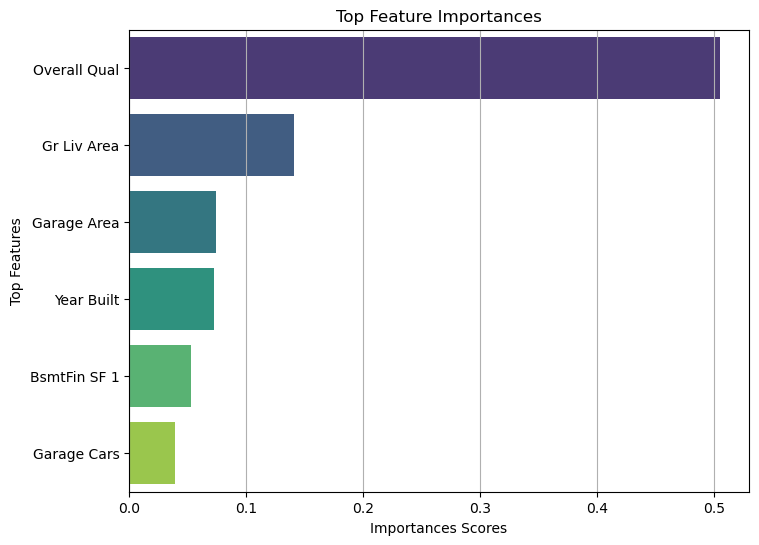

In [602]:
plot_feature_importance_type1(optimal_gbr, X_train.columns, top_n=6)

**These are the descriptions of the Selected Features (Top Features) by the Gradient Boosting Regressor the for Ames Housing dataset:**

* **Overall Qual- Rates the overall material and finish of the house**

* **Gr Liv Area- Above grade (ground) living area square feet**

* **Garage Area- Size of garage in square feet**

* **Year Built- Original construction date**

* **BsmtFin SF 1- Type 1 finished square feet**

* **Garage Cars- Size of garage in car capacity**

**2. Plot of Feature vs Sale Price(Actual vs Predicted)**

In [605]:
def plot_actual_vs_predicted_type1(model, feature_names, X_test, y_test, top_n=5):
    '''
    Plot scatterplots of Actual vs Predicted Sale Price for top_n features. Type1 shows the plot on Jupiter notebook but
    is not saved as a file. Type2 does not show the plot on Jupiter notebook but saves it as file.

    Args:
        model: Trained model
        feature_names: List of feature names (columns)
        X_test:DataFrame of testn features
        y_test: Series or DataFrame of actual target values
        top_n: Number of top features to use
    '''
   


    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    
    # Prepare DataFrame for data
    plot_df = X_test

    # Get feature impotances from model
    importance = model.feature_importances_
    
    # Create Panda Series of importance with feature_names as index
    importance_series = pd.Series(importance, index=feature_names)

    # Sort and get top_n
    top_features = importance_series.sort_values(ascending=False).head(top_n)
    
    # Plot......... same as sns.set(style='whitegrid')
    sns.set_style('whitegrid')
    fig, axes = plt.subplots(top_n, 1, figsize=(8, 8 * top_n))
    
    for i, feature in enumerate(top_features.index):
        ax=axes[i]
        sns.scatterplot(data=plot_df, x=feature, y=y_test.values.ravel(), color='green', label='Actual', ax=ax)
        sns.scatterplot(data=plot_df, x=feature, y=y_pred_optimal, color='red', label='Predicted', ax=ax)
        ax.set_xlabel(feature)
        ax.set_ylabel('Sale Price(Actual=green, Predicted=red)')
        ax.set_title(f'{feature} vs Sale Price(Actual vs Predicted)')
        ax.legend()
    plt.tight_layout()
    plt.suptitle('Feature Sale Price(Actual vs Predicted)---Test Data', fontsize=16, y=1.01)
    plt.show()

In [606]:
def plot_actual_vs_predicted_type2(model, feature_names, X_test, y_test, top_n=5, save=False):
    '''
    Plot scatterplots of Actual vs Predicted Sale Price for top_n features. Type1 shows the plot on Jupiter notebook but
    is not saved as a file. Type2 saves the plot as file and then shows the plot on Jupiter notebook.

    Args:
        model: Trained model
        feature_names: List of feature names (columns)
        X_test:DataFrame of test features
        y_test: Series or DataFrame of actual target values
        top_n: Number of top features to use
        save: to optionally save the plot
    '''
   


    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

    
    # Prepare DataFrame for data
    plot_df = X_test

    # Get feature impotances from model
    importance = model.feature_importances_
    
    # Create Panda Series of importance with feature_names as index
    importance_series = pd.Series(importance, index=feature_names)

    # Sort and get top_n
    top_features = importance_series.sort_values(ascending=False).head(top_n)
    
     # Plot--Also, create figure grid dynamically
    sns.set_style('whitegrid')
    rows = (top_n + 1) // 2
    fig, axes = plt.subplots(rows, 2, figsize=(25, 8 * rows))
    # Since rows > 1, axes becomes a 2D numpy array object whose index is difficult to access.
    # Flatten the axes to simplify indexing
    axes = axes.flatten()
    
    for i, feature in enumerate(top_features.index):
        ax=axes[i]
        sns.scatterplot(data=plot_df, x=feature, y=y_test.values.ravel(), color='green', label='Actual', ax=ax)
        sns.scatterplot(data=plot_df, x=feature, y=y_pred_optimal, color='red', label='Predicted', ax=ax)
        ax.set_xlabel(feature)
        ax.set_ylabel('Sale Price(Actual=green, Predicted=red)')
        ax.set_title(f'{feature} vs Sale Price(Actual vs Predicted)')
        ax.legend()

    # Hide empty subplots if any
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
        
    plt.tight_layout()
    plt.suptitle('Feature Sale Price(Actual vs Predicted)---Test Data', fontsize=16, y=1.01)

    if save:
        save_plot('Actual_vs_Predicted')

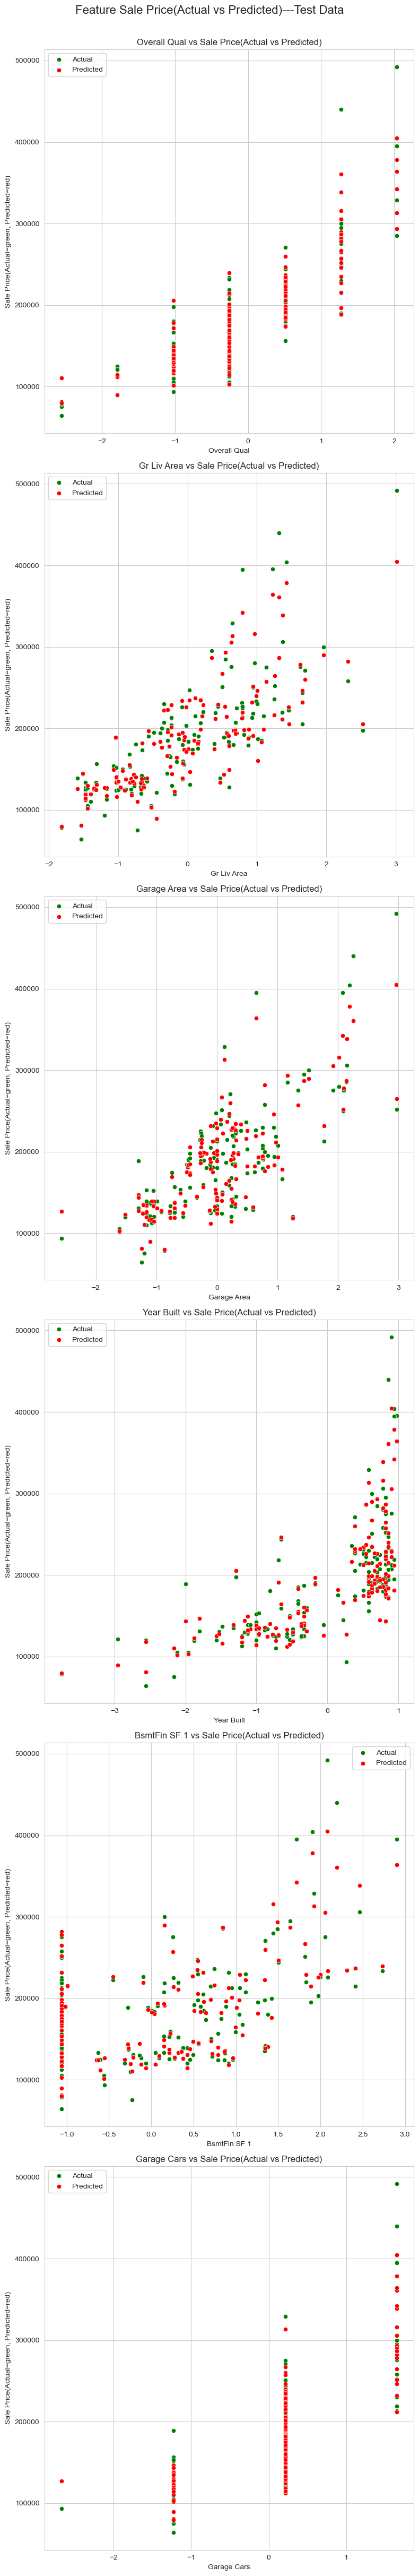

In [607]:
plot_actual_vs_predicted_type1(optimal_gbr, X_test.columns, X_test, y_test, top_n=6)

In [608]:
def plot_density_heatmap_with_predictions_type1(model, feature_names, X_test, y_test, top_n=5, cmap='coolwarm'):
    '''
    Plots heatmap density (kdeplot) of actual sale price with scatter plot of model prediction overlaid. Type1 shows the plot on Jupiter notebook but
    is not saved as a file. Type2 does not show the plot on Jupiter notebook but saves it as file.

    Args:
        model: Trained model
        feature_names: List of feature names (columns)
        X_test:DataFrame of test features
        y_test: Series or DataFrame of actual target values
        top_n: Number of top features to use
        cmap: Color map for density plot
    '''
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

   
    # Prepare DataFrame
    plot_df = X_test.copy()
    

    # Get feature impotances from model
    importance = model.feature_importances_
    
    # Create Panda Series of importance with feature_names as index
    importance_series = pd.Series(importance, index=feature_names)

    # Sort and get top_n
    top_features = importance_series.sort_values(ascending=False).head(top_n) 

    # Plot--Also, create figure grid dynamically
    sns.set_style('whitegrid')
    rows = (top_n + 1) // 2
    fig, axes = plt.subplots(rows, 2, figsize=(25, 10 * rows))
    # Since rows > 1, axes becomes a 2D numpy array object whose index is difficult to access.
    # Flatten the axes to simplify indexing
    axes = axes.flatten()
    
    for i, feature in enumerate(top_features.index):
        ax = axes[i]

        # Density Heatmap
        sns.kdeplot(data=plot_df, x=feature, y=y_test, cmap=cmap, fill=True, thresh=0.05, levels=100, alpha=0.6, ax=ax)

        # Predicted Sale Price Points
        sns.scatterplot(data=plot_df, x=feature, y=y_pred_optimal, color='black', markers='X', size=100, alpha=0.4, ax=ax)

        ax.set_xlabel(feature, fontsize=17)
        ax.set_ylabel('Sale Price', fontsize=17)
        ax.set_title(f'{feature} vs Sale Price\n(Heatmap Density)', fontsize=20)
        ax.legend()

    # Hide empty subplots if any
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.suptitle('Sale Price Density vs Predictions(Test Data)', fontsize=30, y=1.01)
    plt.tight_layout()
    plt.show()

In [609]:
def plot_density_heatmap_with_predictions_type2(model, feature_names, X_test, y_test, top_n=5, cmap='coolwarm', save=False):
    '''
    Plots heatmap density (kdeplot) of actual sale price with scatter plot of model prediction overlaid. Type1 shows the plot on Jupiter notebook but
    is not saved as a file. Type2 saves the plot as file and then shows the plot on Jupiter notebook.

    Args:
        model: Trained model
        feature_names: List of feature names (columns)
        X_test:DataFrame of test features
        y_test: Series or DataFrame of actual target values
        top_n: Number of top features to use
        cmap: Color map for density plot
        save: to optionally save the plot
    '''
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    
    # Prepare DataFrame
    plot_df = X_test.copy()
    

    # Get feature impotances from model
    importance = model.feature_importances_
    
    # Create Panda Series of importance with feature_names as index
    importance_series = pd.Series(importance, index=feature_names)

    # Sort and get top_n
    top_features = importance_series.sort_values(ascending=False).head(top_n) 

    # Plot--Also, create figure grid dynamically
    sns.set_style('whitegrid')
    rows = (top_n + 1) // 2
    fig, axes = plt.subplots(rows, 2, figsize=(25, 8 * rows))
    # Since rows > 1, axes becomes a 2D numpy array object whose index is difficult to access.
    # Flatten the axes to simplify indexing
    axes = axes.flatten()
    
    for i, feature in enumerate(top_features.index):
        ax = axes[i]

        # Density Heatmap
        sns.kdeplot(data=plot_df, x=feature, y=y_test, cmap=cmap, fill=True, thresh=0.05, levels=100, alpha=0.6, ax=ax)

        # Predicted Sale Price Points
        sns.scatterplot(data=plot_df, x=feature, y=y_pred_optimal, color='black', markers='X', size=100, alpha=0.4, ax=ax)

        ax.set_xlabel(feature, fontsize=17)
        ax.set_ylabel('Sale Price', fontsize=17)
        ax.set_title(f'{feature} vs Sale Price\n(Heatmap Density)', fontsize=20)
        ax.legend()

    # Hide empty subplots if any
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)

    plt.suptitle('Sale Price Density vs Predictions(Test Data)', fontsize=30, y=1.01)
    plt.tight_layout()
    

    if save:
        save_plot('DensityHeatmap_with_Predictions')

**We now call the function plot_density_heatmap_with_predictions**

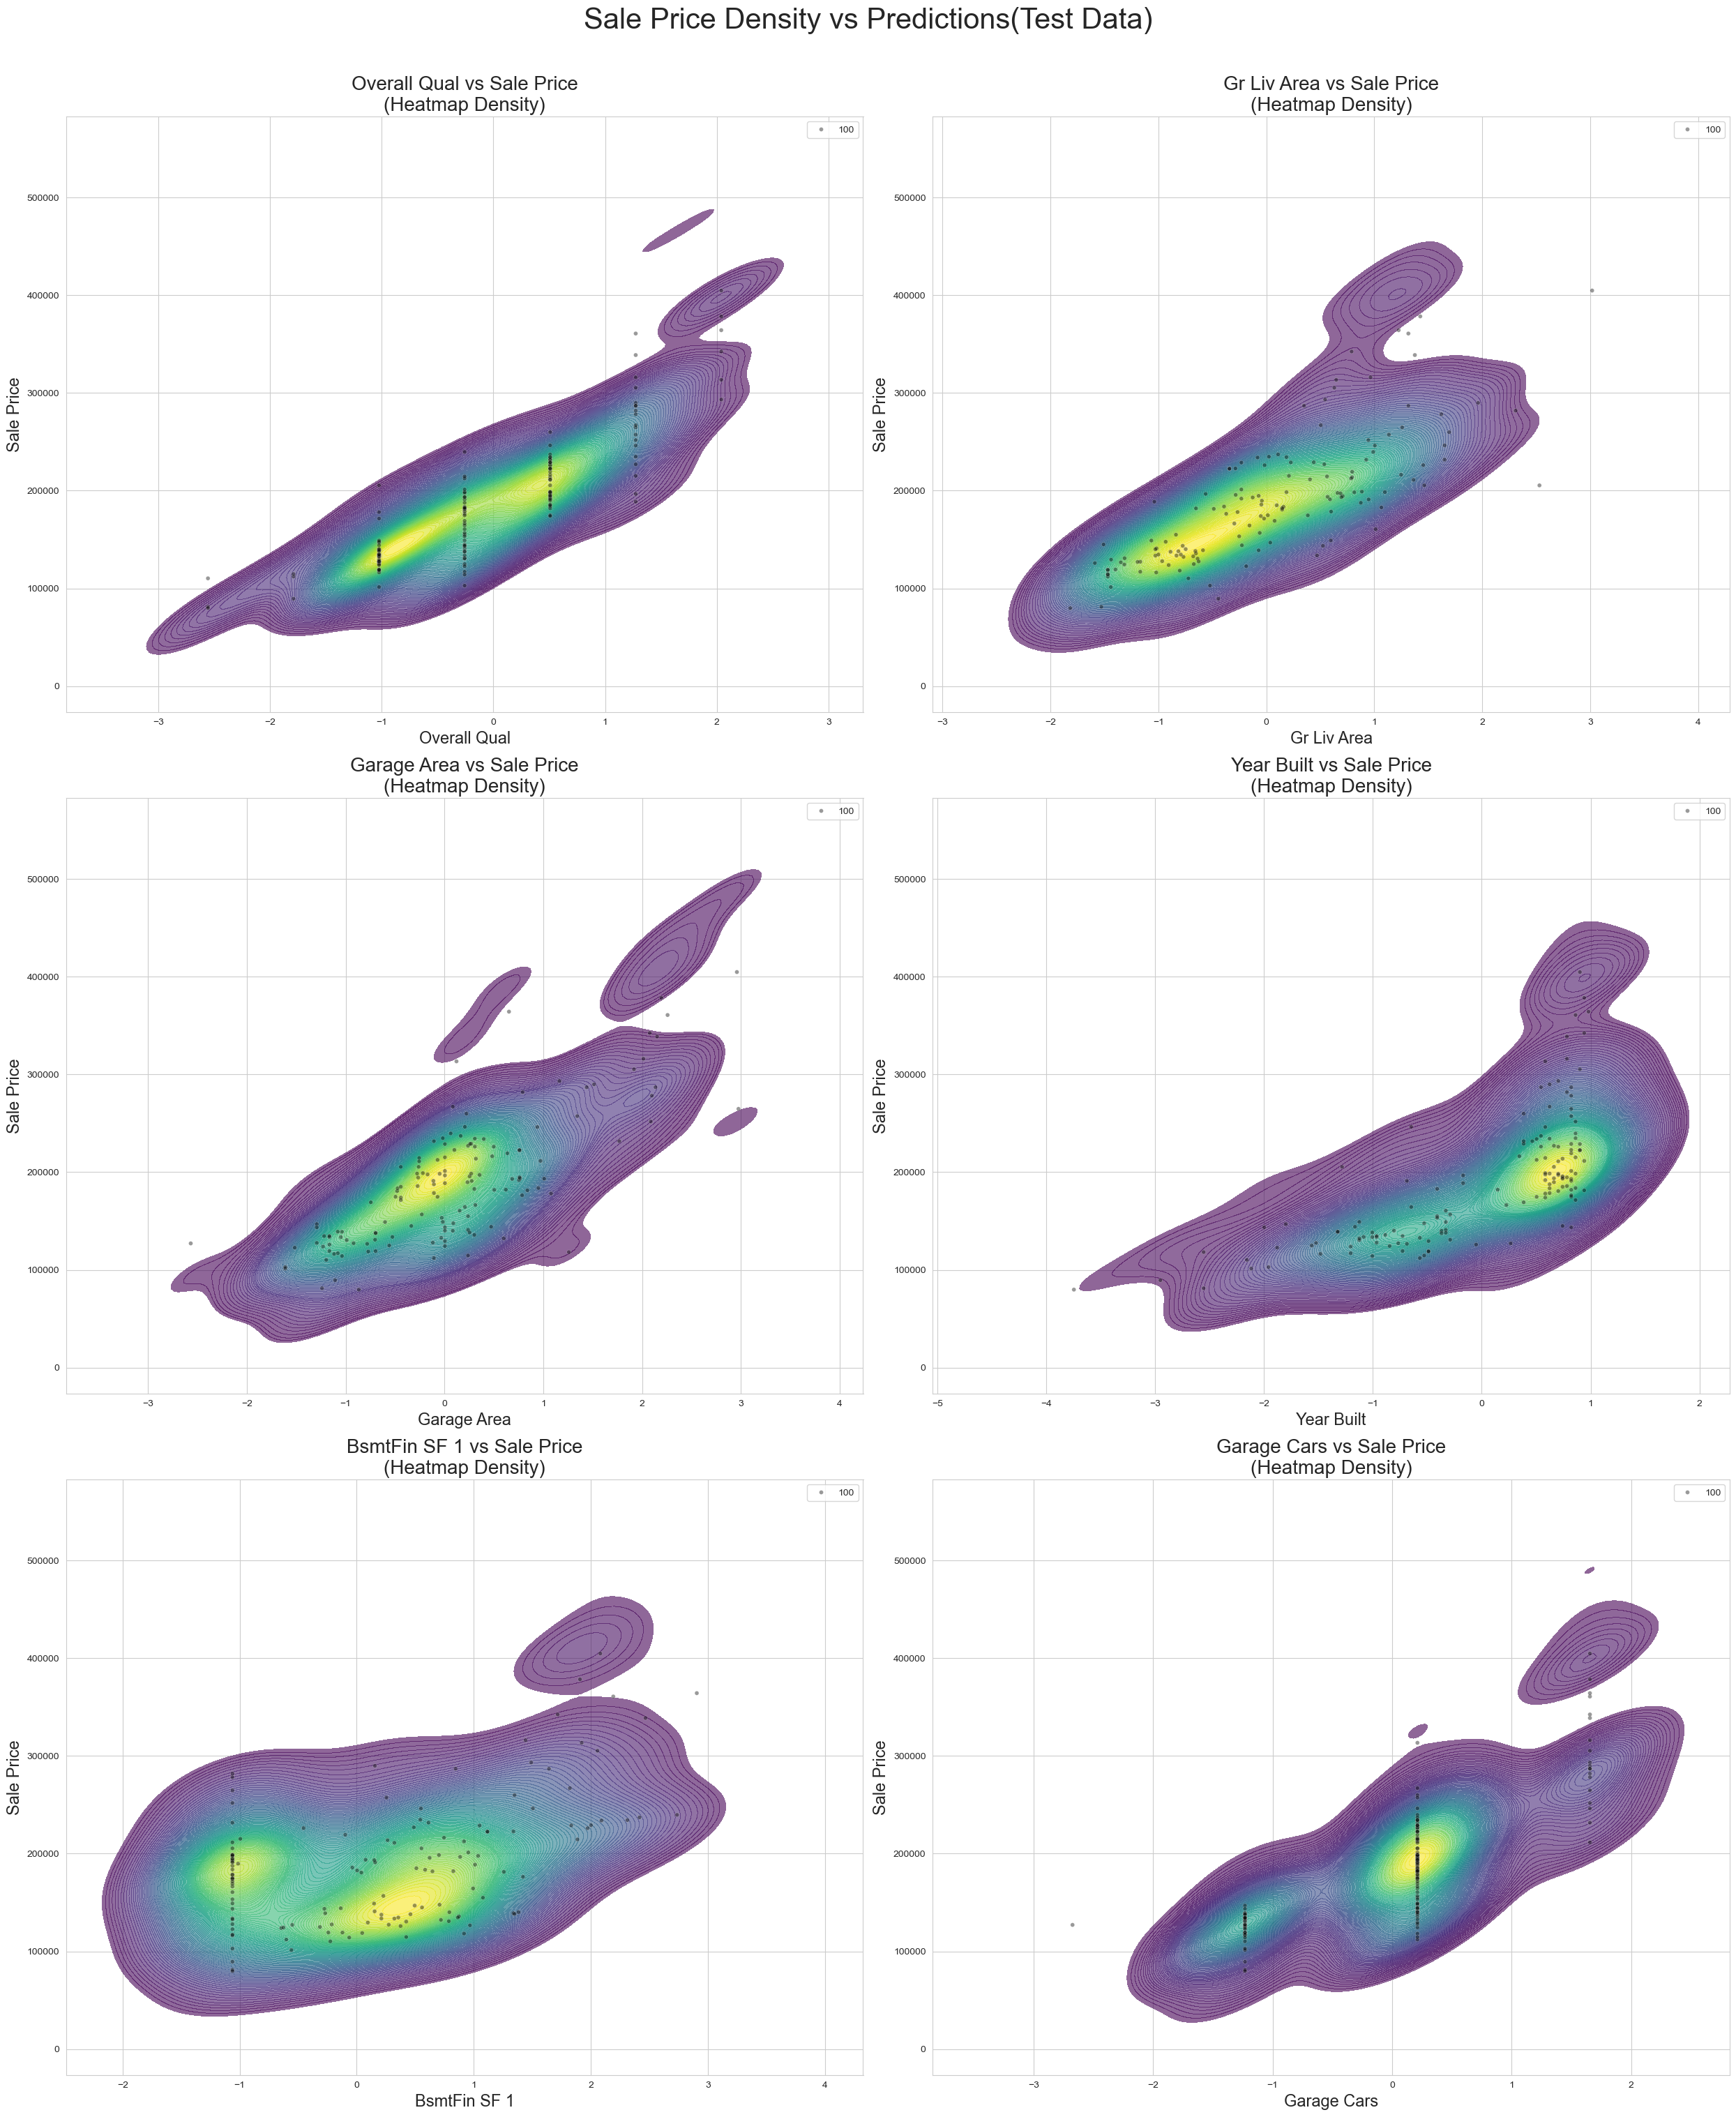

In [611]:
plot_density_heatmap_with_predictions_type1(optimal_gbr, X_test.columns, X_test, y_test, cmap='viridis', top_n=6)

**Now Let's create a 'helper' function to save our plots in 'plots' folder**

In [613]:
def save_plot(filename, folder='plots'):
    '''
    Saves the 'current' matplotlib figure into a folder.

    Args:
        filename: Name of the saved file (without extension e.g., 'feature_importance')
        folder: Folder name (default is 'plots')
    '''

    import os
    import matplotlib.pyplot as plt

    if not os.path.exists(folder):
        os.makedirs(folder)

    # Create full path
    filepath = os.path.join(folder, f'{filename}.png')
    plt.savefig(filepath, bbox_inches='tight', dpi=300)
    print(f'Saved plot to {filepath}')

**We update our existing plot functions to save plot optionally. save=False should be defined in the function argument**

**otherwise we get error (save not defined)**

**We ceate our Dashboard, and pass save=True if we want to Autosave**

In [616]:
def dashboard(
    model,
    feature_names,
    X_test,
    y_test,
    top_n=5,
    cmap='coolwarm',
    save=False
):
    print('\n---Feature Importances---\n')
    plot_feature_importance_type2(model, feature_names, top_n=top_n, save=save)

    print('\n---Actual vs Predicted Sale Price---\n')
    plot_actual_vs_predicted_type2(model, feature_names, X_test, y_test, top_n=top_n, save=save)

    print('\n---Density Heatmap with Predictions---\n')
    plot_density_heatmap_with_predictions_type2(model, feature_names, X_test, y_test, top_n=top_n, cmap=cmap, save=save)

**Now let's call our Dashboard to autosave our plots**


---Feature Importances---

Saved plot to plots\feature_importance.png

---Actual vs Predicted Sale Price---

Saved plot to plots\Actual_vs_Predicted.png

---Density Heatmap with Predictions---

Saved plot to plots\DensityHeatmap_with_Predictions.png


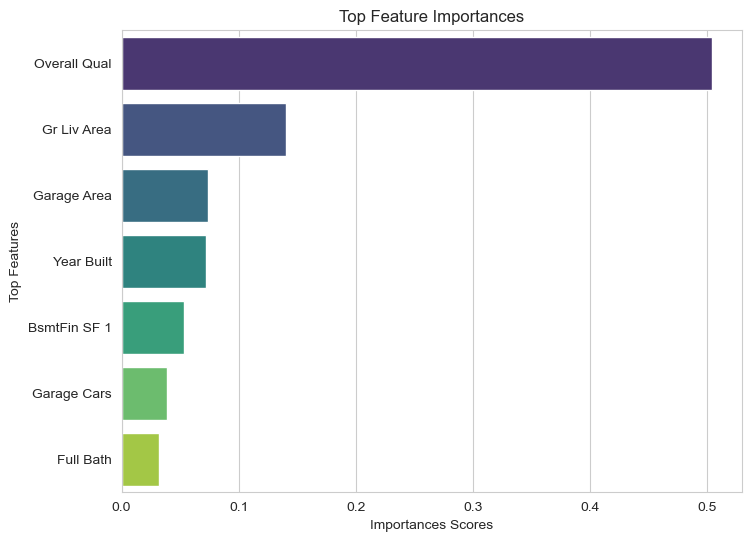

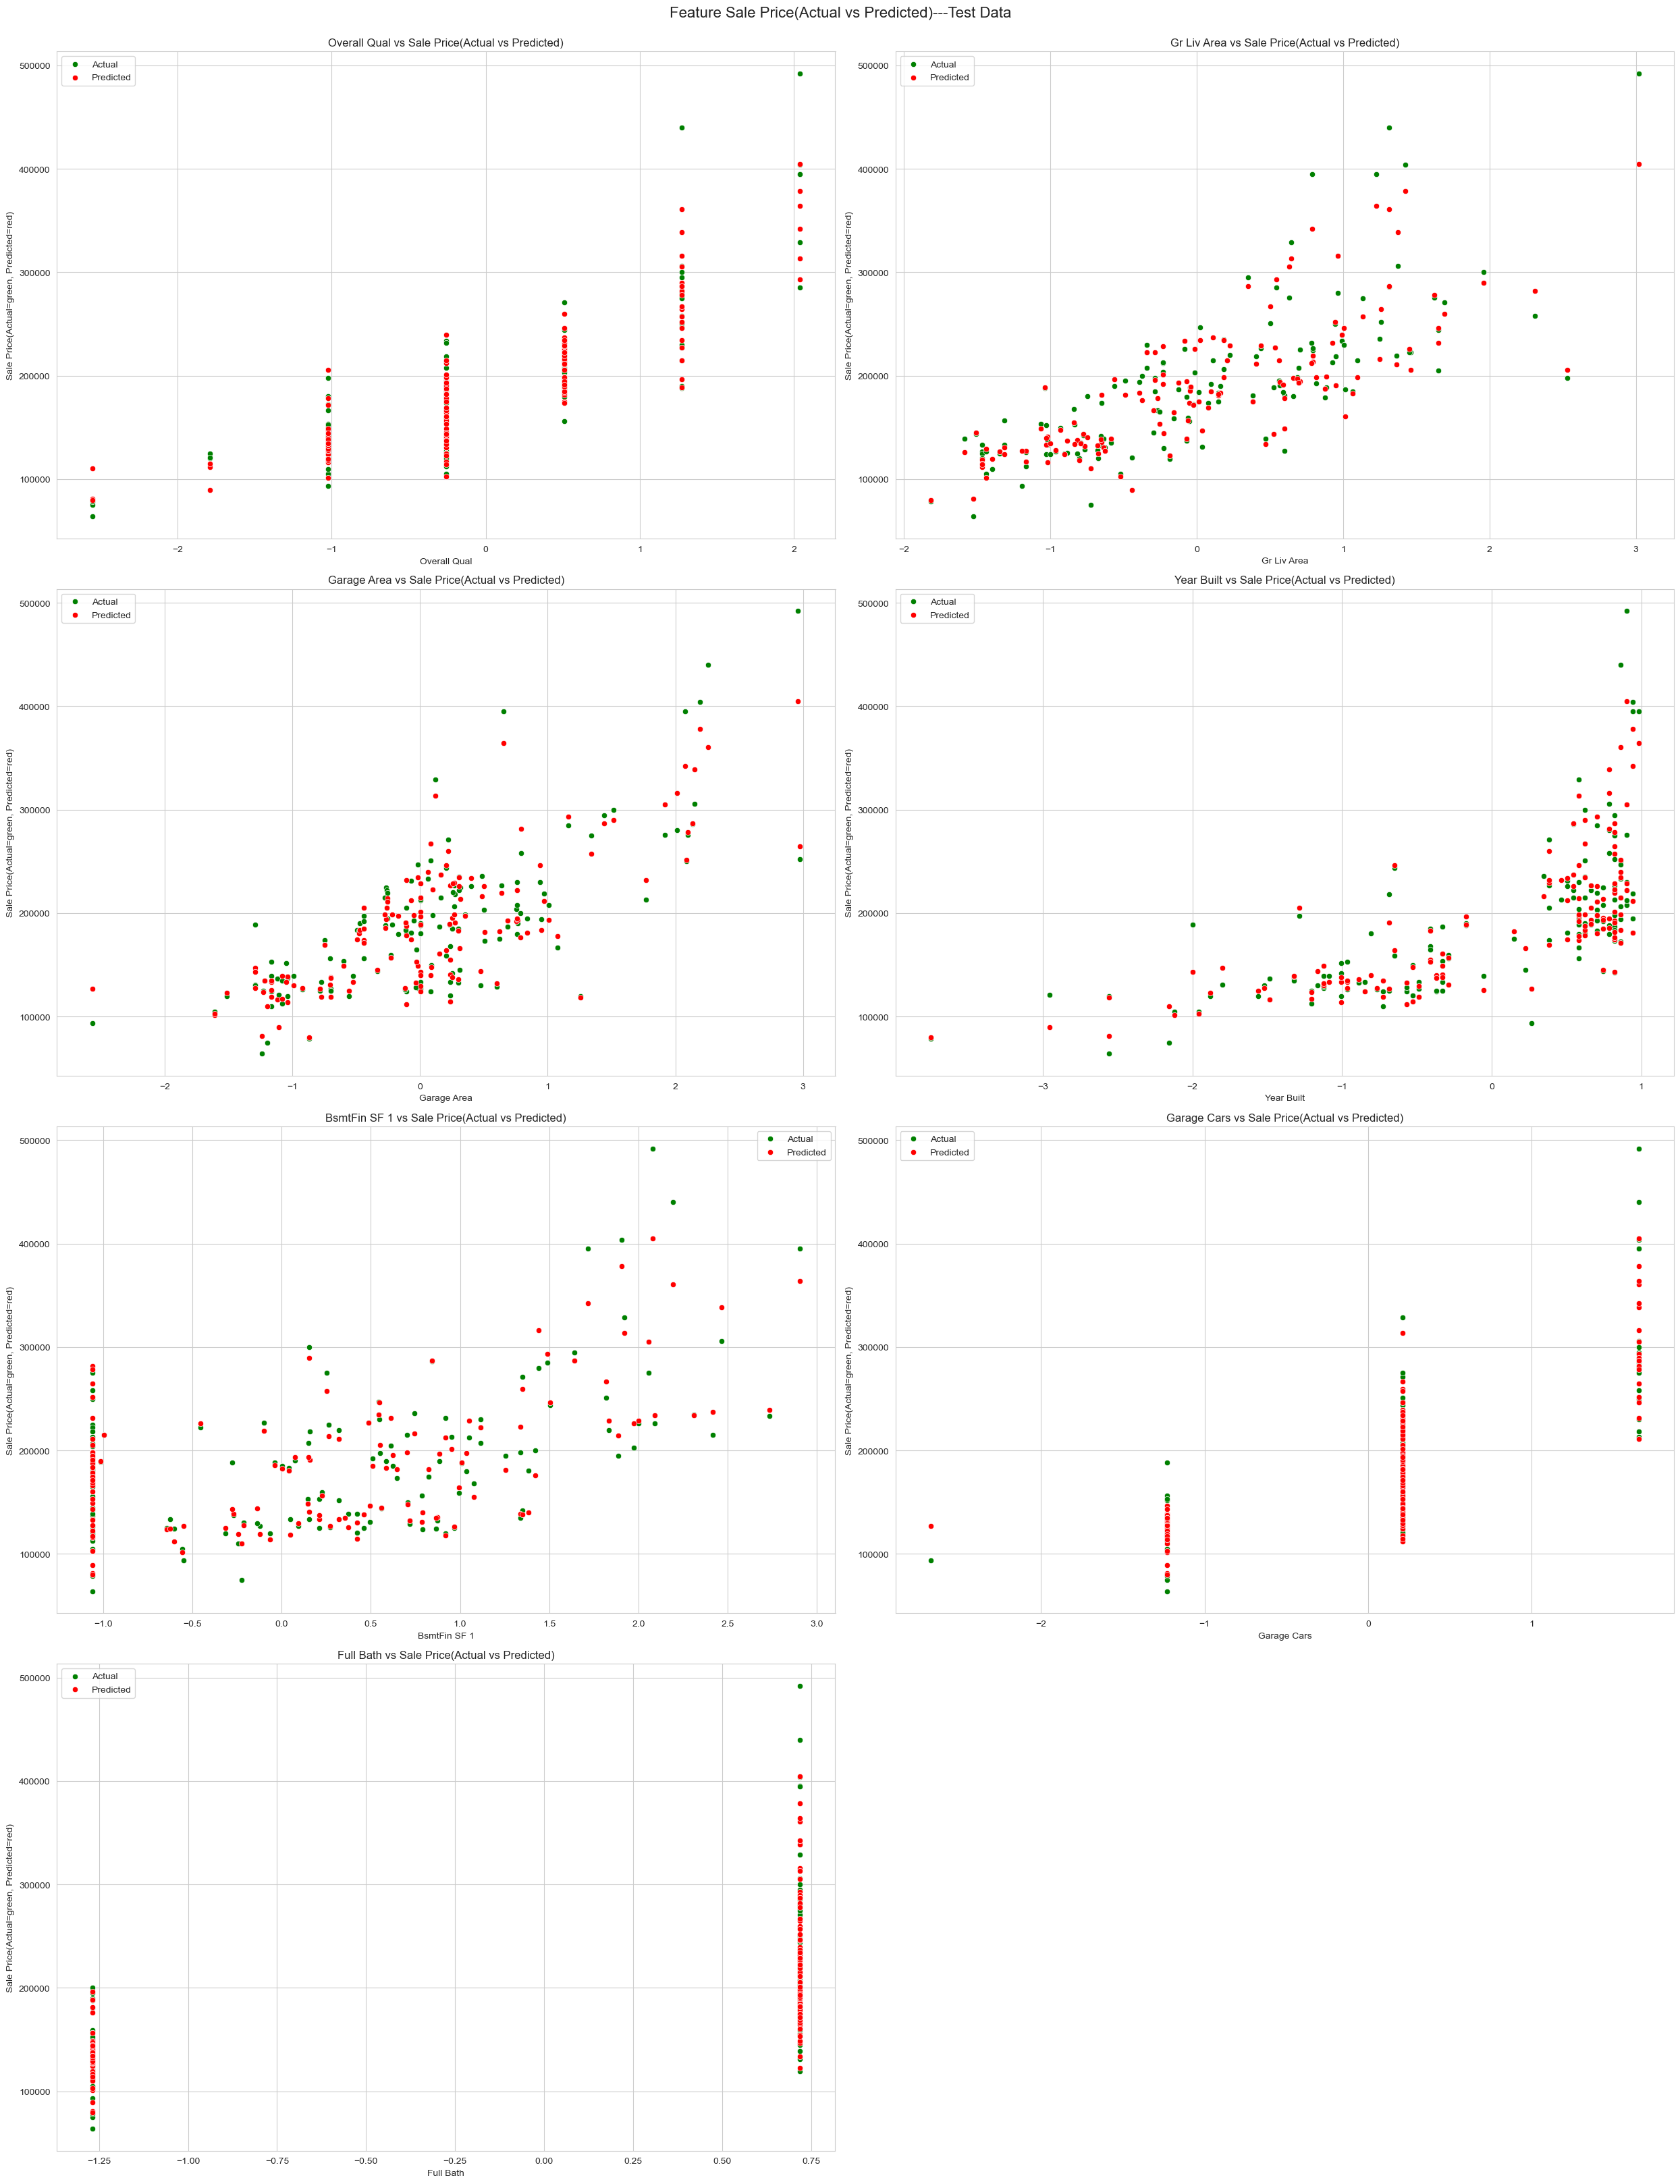

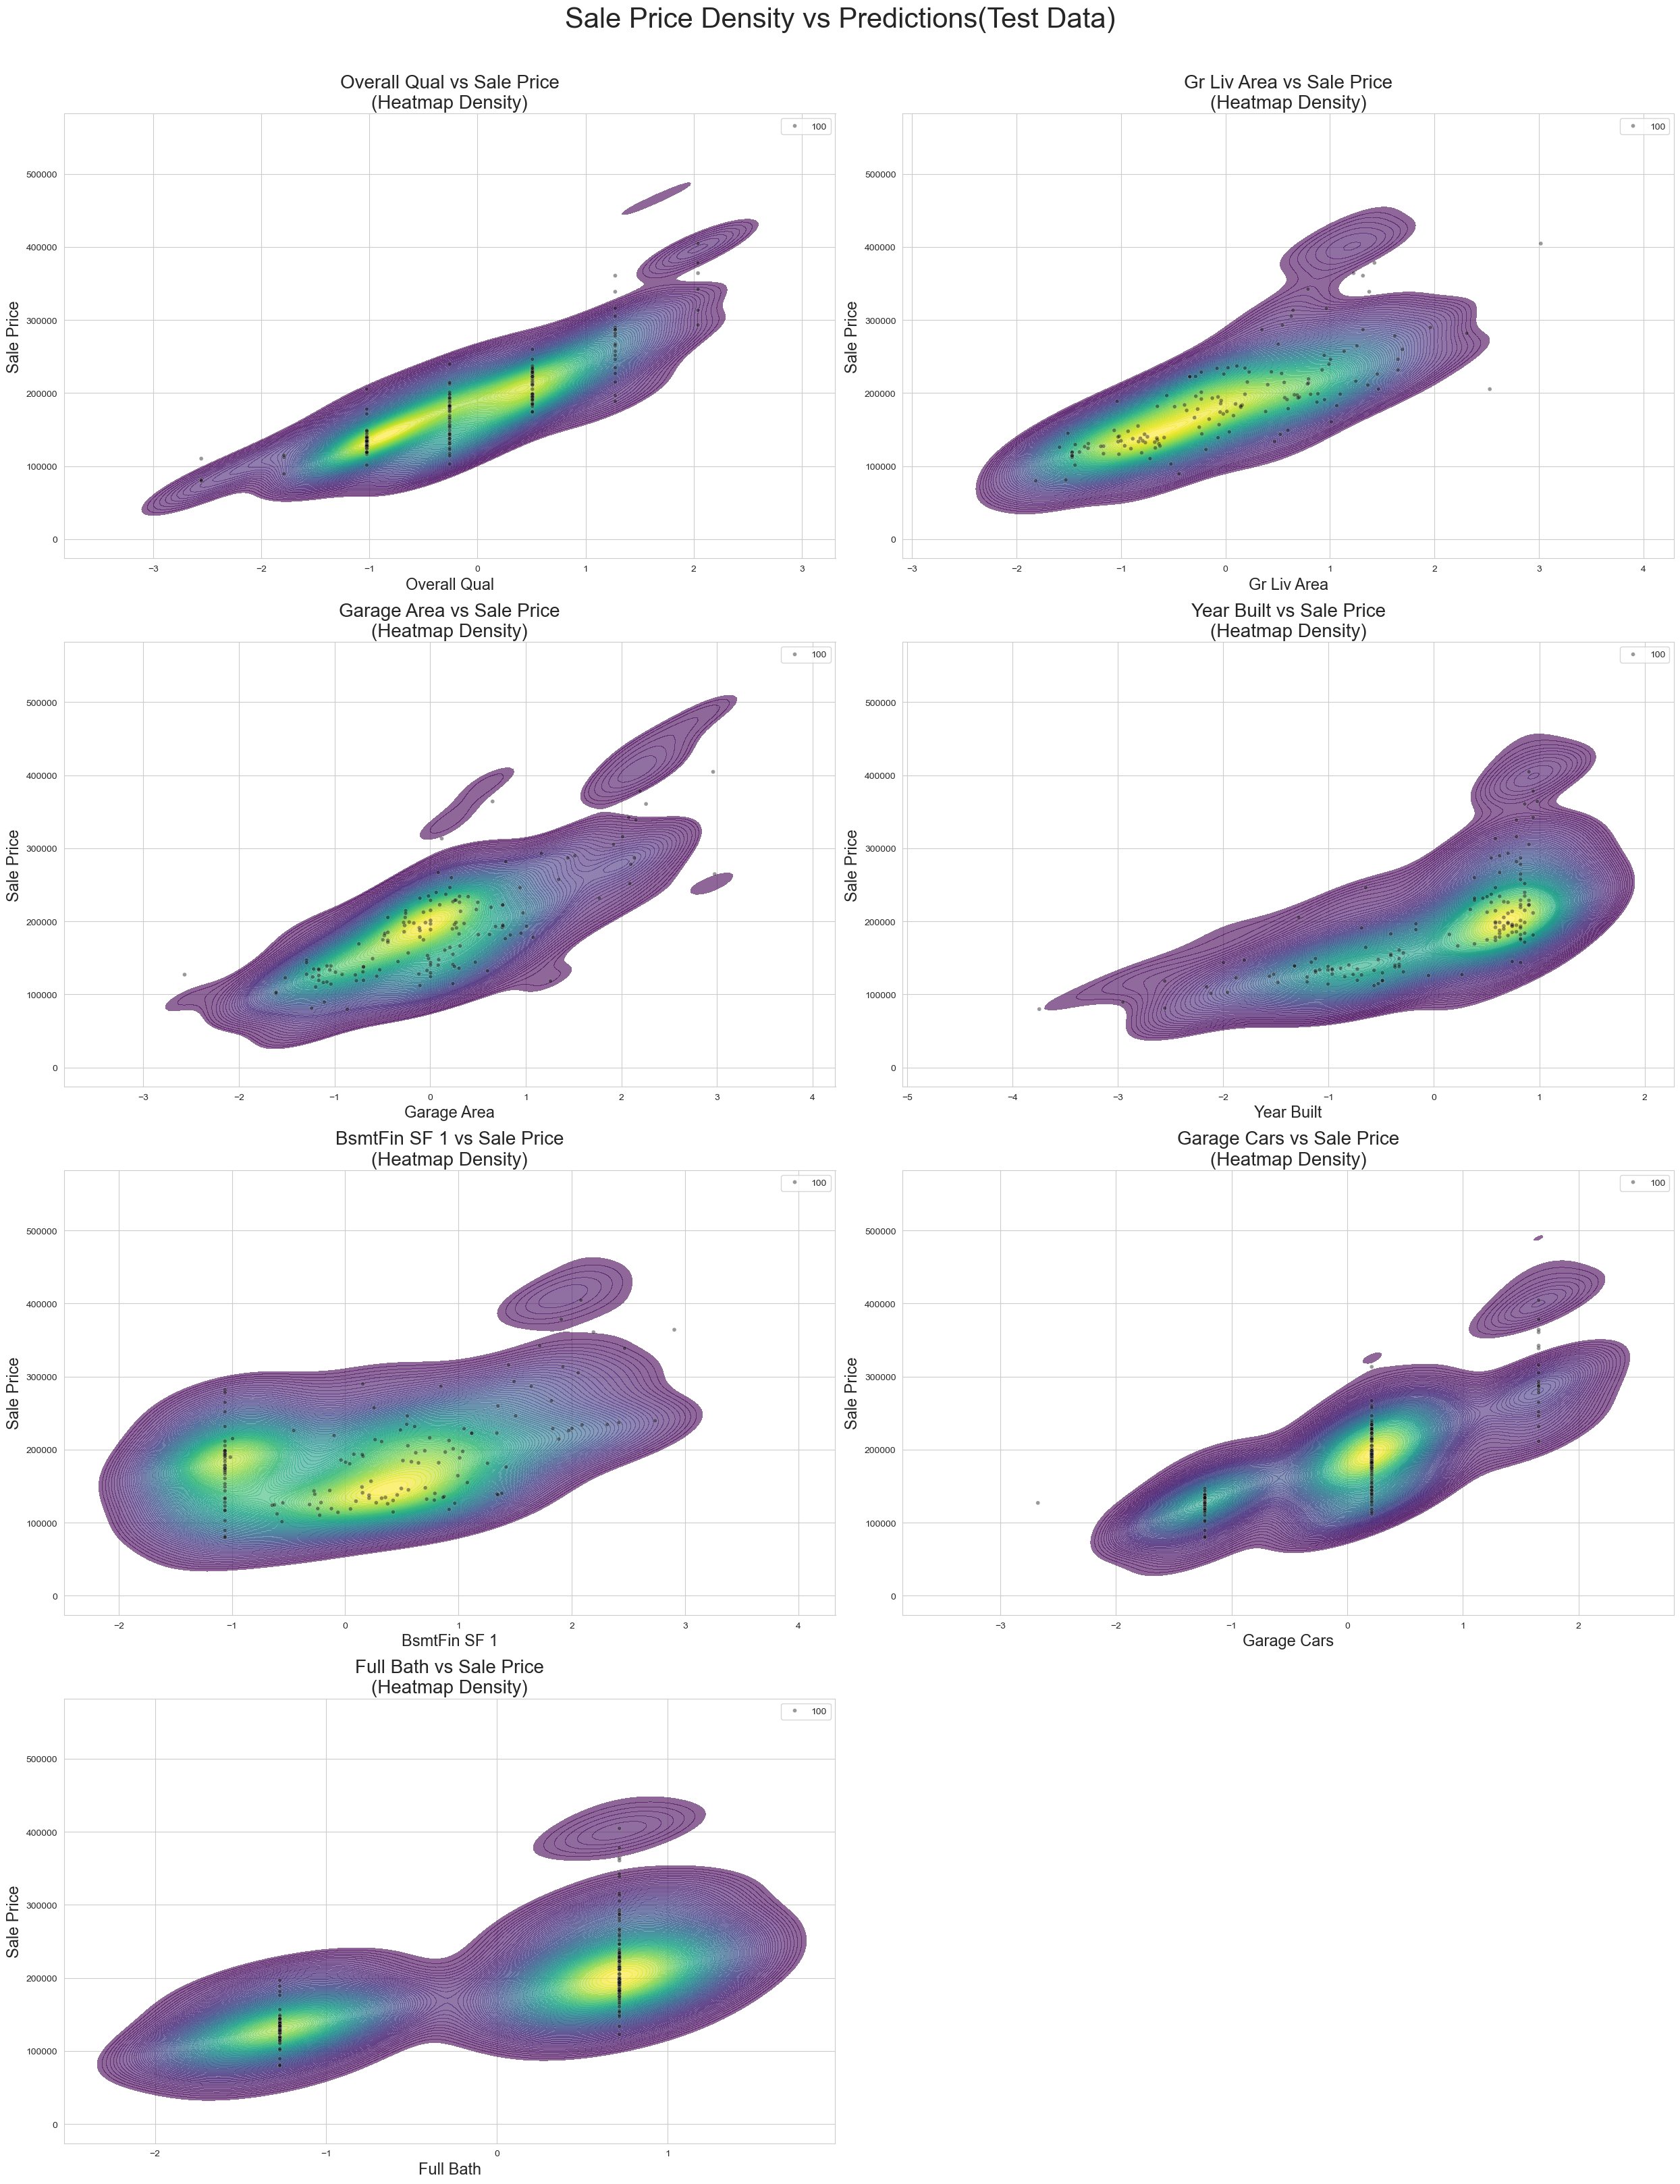

In [618]:
dashboard(optimal_gbr, X_test.columns, X_test, y_test, cmap='viridis', top_n=7, save=True)

**Now we will create a function that bundles all saved plots into a single PDF report, and includes a summary page and cover page.**

**We must first install reportlab and pillow as:**

* **pip install reportlab pillow**

In [621]:
def generate_pdf_report(
    model,
    image_folder='plots',
    output_pdf='model_report.pdf',
    title='Model Report',
    dataset_name='Ames Housing Dataset',
    author='Your Name',
    r2_score=None
):
    '''
    Generates a single PDF file from all .png files in a folder, with a summary page and a cover page.

    Args:
        model: Trained model
        image_folder: Folder where plots are saved
        output_pdf: Output PDF file name
        title: Title for the cover page
        dataset_name: Dataset description
        author: Name of the author
        r2_score: Optional R2 score to display
    '''

    from reportlab.pdfgen import canvas
    from reportlab.lib.pagesizes import A4
    from reportlab.lib.units import inch
    from PIL import Image
    import os
    import datetime
    
    # Initialize canvas
    c = canvas.Canvas(output_pdf, pagesize=A4)
   
    width, height = A4
    
    # ----Cover Page----
    c.setFont('Helvetica-Bold', 24)
    c.drawCentredString(width / 2, height - 100, title)
    
    c.setFont('Helvetica', 16)
    c.drawCentredString(width / 2, height - 140, f'Dataset: {dataset_name}')
    c.drawCentredString(width / 2, height -170, f'Author: {author}')
    
    if r2_score is not None:
        c.drawCentredString(width / 2, height - 200, f'Model R2 Score: {r2_score:.2f}')

    c.setFont('Helvetica-Oblique', 12)
    c.drawCentredString(width / 2, height - 240, f'Generated on: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}')
    c.showPage()
    
    # ----Model Summary Page----
    c.setFont('Helvetica-Bold', 18)
    c.drawCentredString(100, height -100, 'Model Summary')

    c.setFont('Helvetica', 12)
    c.drawCentredString(110, height -130, f'Model Type: {type(model).__name__}')
    c.drawCentredString(100, height - 150, 'Hyperparameters:')

    y_pos = height - 170
    for param, value in model.get_params().items():
        c.drawString(120, y_pos, f'- {param}: {value}')
        y_pos -= 15
        if y_pos < 100:
            c.showPage()
            y_pos = height - 100

    c.showPage()

    # ----Plot Pages---- The next line is a comprehension list, an succient alternative to a 'for loop'
    images = sorted([f for f in os.listdir(image_folder) if f.endswith('.png')])

    if not images:
        print(f'No images found in folder: {image_folder}')
    else:
        
        for img_file in images:
            img_path = os.path.join(image_folder, img_file)
    
            with Image.open(img_path) as img:
                if img.mode == 'RGBA':
                    img = img.convert('RGB')
                img_width, img_height = img.size
                aspect = img_height / img_width
                max_width = width * 0.9
                new_width =min(max_width, img_width)
                new_height = new_width * aspect
    
            x = (width - new_width) / 2
            y = (height - new_height) / 2
            c.drawImage(img_path, x, y, width=new_width, height=new_height)
            c.showPage()
            
    c.save()
    print(f'\nPDF Report saved as: {output_pdf}')

**Now let's call our Dashboard to autosave our plots, and generate our model pdf report**

In [623]:
generate_pdf_report(
    optimal_gbr,
    image_folder='plots',
    output_pdf='GradientBoostingRegressor_report.pdf',
    title='Gradient Boosting Regressor Report',
    dataset_name='Ames Housing Dataset',
    author='Paul Adenigba',
    r2_score=optimal_gbr.score(X_test, y_test)
)


PDF Report saved as: GradientBoostingRegressor_report.pdf


## Model Interpretability/Explainability- with SHAP (SHapley Additive exPlanation)
**SHAP values are a common way of getting a consistent and objective explaination of how each feature impacts the model's prediction**

**They explain the predictions, not the actuals**

In [625]:
# Train Gradient Boosting Regressor (Already done above)

# Create a SHAP Explainer
explainer = shap.Explainer(optimal_gbr)

# Calculate SHAP values
shap_values = explainer(X_test)

**Visualize Feature Importance and Contributions to predictions**

In [627]:
#shap.plots.beeswarm(shap_values)

In [628]:
#shap.plots.bar(shap_values)

**Visualize first prediction explanation:**

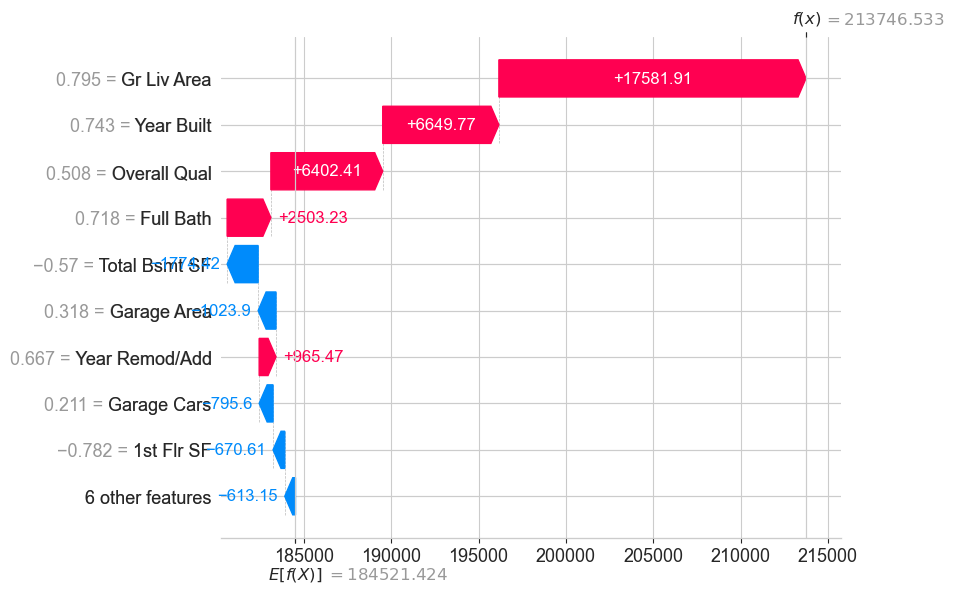

In [630]:
shap.plots.waterfall(shap_values[0])

**The waterfall plot shows how each feature in a given instance contributes to the final prediction**

**We will be using this plot in our sale price estimator app**

In [634]:
X_test.shape

(143, 15)

**Visualize last prediction explanation:**

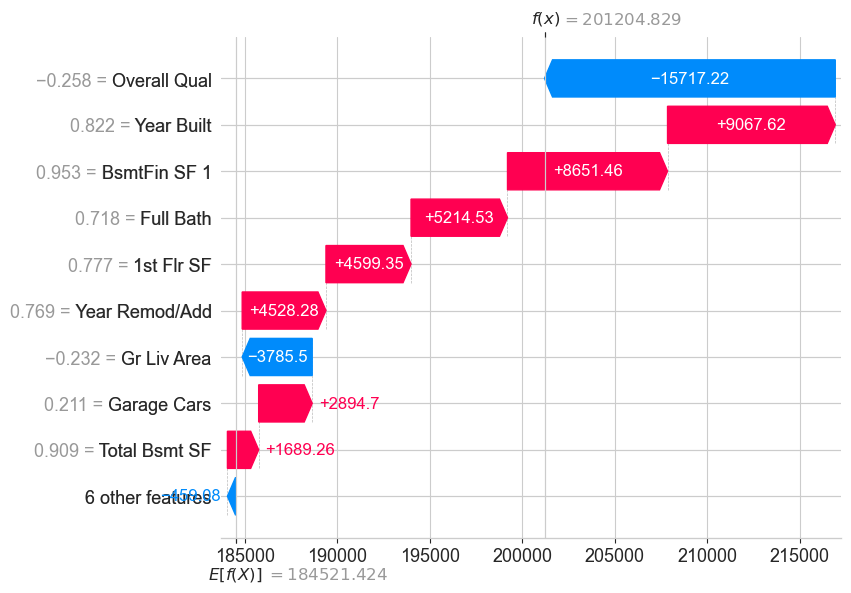

In [644]:
shap.plots.waterfall(shap_values[-1])
# Same as running shap.plots.waterfall(shap_values[142])

In [ ]:
# Initialize the JS visualization 
#shap.initjs()
#shap.plots.force(shap_values[0])

**A peak into the Actual SalePrice**

In [ ]:
#print(y_test.head())

In [ ]:
#print(y_test.tail())

In [ ]:
#print(y_test.shape)

**Visualize the test dataset explanation:**

In [ ]:
#shap.plots.force(shap_values[:143])

In [653]:
show = pd.DataFrame(Ames, columns=['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Year Built', 'BsmtFin SF 1', 'Garage Cars', 'Full Bath'])
show.head()

Overall Qual  Gr Liv Area  Garage Area  Year Built  BsmtFin SF 1  \
0             6         1656        528.0        1960         639.0   
1             5          896        730.0        1961         468.0   
2             6         1329        312.0        1958         923.0   
3             7         2110        522.0        1968        1065.0   
4             5         1629        482.0        1997         791.0   

   Garage Cars  Full Bath  
0          2.0          1  
1          1.0          1  
2          1.0          1  
3          2.0          2  
4          2.0          2

In [655]:
show.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Overall Qual  2930 non-null   int64  
 1   Gr Liv Area   2930 non-null   int64  
 2   Garage Area   2929 non-null   float64
 3   Year Built    2930 non-null   int64  
 4   BsmtFin SF 1  2929 non-null   float64
 5   Garage Cars   2929 non-null   float64
 6   Full Bath     2930 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 160.4 KB


In [673]:
show.describe()

Overall Qual  Gr Liv Area  Garage Area   Year Built  BsmtFin SF 1  \
count   2930.000000  2930.000000  2929.000000  2930.000000   2929.000000   
mean       6.094881  1499.690444   472.819734  1971.356314    442.629566   
std        1.411026   505.508887   215.046549    30.245361    455.590839   
min        1.000000   334.000000     0.000000  1872.000000      0.000000   
25%        5.000000  1126.000000   320.000000  1954.000000      0.000000   
50%        6.000000  1442.000000   480.000000  1973.000000    370.000000   
75%        7.000000  1742.750000   576.000000  2001.000000    734.000000   
max       10.000000  5642.000000  1488.000000  2010.000000   5644.000000   

       Garage Cars    Full Bath  
count  2929.000000  2930.000000  
mean      1.766815     1.566553  
std       0.760566     0.552941  
min       0.000000     0.000000  
25%       1.000000     1.000000  
50%       2.000000     2.000000  
75%       2.000000     2.000000  
max       5.000000     4.000000

In [671]:
sio.dump(optimal_gbr, './Ames_SalePrice_model.skops')

In [669]:
sio.dump(scaler, './scaler.skops')